### Import modules for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
df = pd.read_csv("Data/HR_Analytics.csv")

### Explore the data

Let's have a first look

In [3]:
df

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3          3  Life Sciences  ...   
1                      Sales                10          3        Medical  ...   
2                      Sales                 5          3      Marketing  ...   
3     Research & Development                 5          2  Life Sciences  ...   
4     Research & Development                 8          1        Medical  ...   
...                      ...               ...        ...            ...  ...   
1475  Research & Development                 7          3  Life Sciences  ...   
1476                   Sales                28          3      Marketing  ...   
1477                   Sales                16          4      Marketing  ...   
1478                   Sales                 7          4      Marketing  ...   
1479  Research & Development                 1          4        Medical  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            3             80                 0   
1                            1             80                 0   
2                            4             80                 0   
3                            4             80                 0   
4                            4             80                 0   
...                        ...            ...               ...   
1475                         4             80                 0   
1476                         4             80                 0   
1477                         4             80                 0   
1478                         2             80                 1   
1479                         3             80                 1   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    0                      2                3   
1                    0                      2                3   
2                    0                      3                3   
3                    0                      2                3   
4                    0                      0                3   
...                ...                    ...              ...   
1475                33                      5                1   
1476                22                      5                4   
1477                10                      1                3   
1478                12                      3                3   
1479                19                      2                4   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                  0                        0   
1                  0                  0                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   
...              ...                ...                      ...   
1475              29                  8                       11   
1476              18                 13            

Take a look at the datatypes and missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

Sort columns and take a look at the unique categories

In [15]:
nomcats = ["AgeGroup", "SalarySlab", "Department", "EducationField", "JobRole", "MaritalStatus"]
numcats = ["Education", "EnvironmentSatisfaction", "BusinessTravel", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", 
           "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance", "OverTime", "Gender"]
numgrads = ["Attrition", "Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", 
           "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", 
           "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
delcols = ["EmpID", "EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]

for col in (nomcats + numcats):
    print(f"Uniques in {col}:\t{df[col].unique()}")

Uniques in AgeGroup:	['18-25' '26-35' '36-45' '46-55' '55+']
Uniques in SalarySlab:	['Upto 5k' '5k-10k' '10k-15k' '15k+']
Uniques in Department:	['Research & Development' 'Sales' 'Human Resources']
Uniques in EducationField:	['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
Uniques in JobRole:	['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']
Uniques in MaritalStatus:	['Single' 'Divorced' 'Married']
Uniques in Education:	[3 2 1 4 5]
Uniques in EnvironmentSatisfaction:	[3 4 2 1]
Uniques in BusinessTravel:	['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Uniques in JobInvolvement:	[3 2 1 4]
Uniques in JobLevel:	[1 2 3 4 5]
Uniques in JobSatisfaction:	[3 2 4 1]
Uniques in PerformanceRating:	[3 4]
Uniques in RelationshipSatisfaction:	[3 1 4 2]
Uniques in StockOptionLevel:	[0 2 1 3]
Uniques in WorkLifeBalance:	[3 4

Some initial housekeeping...

Are there duplicates?

In [7]:
df.duplicated().sum()

7

In [8]:
df = df.drop(["EmpID", "EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)
df = df.drop_duplicates()

#delete/impute missing data:
#    "YearsWithCurrManager": nan -> ?

df["Attrition"] = df["Attrition"].replace({"Yes": 1, "No": 0})
df["OverTime"] = df["OverTime"].replace({"Yes": 1, "No": 0})
df["Gender"] = df["Gender"].replace({"Female": 1, "Male": 0})
df["BusinessTravel"] = df["BusinessTravel"].replace({"TravelRarely": "Travel_Rarely"})

######## DEPRECATED ##########
#df["AgeGroup"] = pd.Categorical(df["AgeGroup"], categories=['18-25', '26-35', '36-45', '46-55', '55+'], ordered=True)
#df["BusinessTravel"] = pd.Categorical(df["BusinessTravel"], categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
#df["SalarySlab"] = pd.Categorical(df["SalarySlab"], categories=['Upto 5k', '5k-10k', '10k-15k', '15k+'], ordered=True)

Check for direct correlations

<AxesSubplot:>

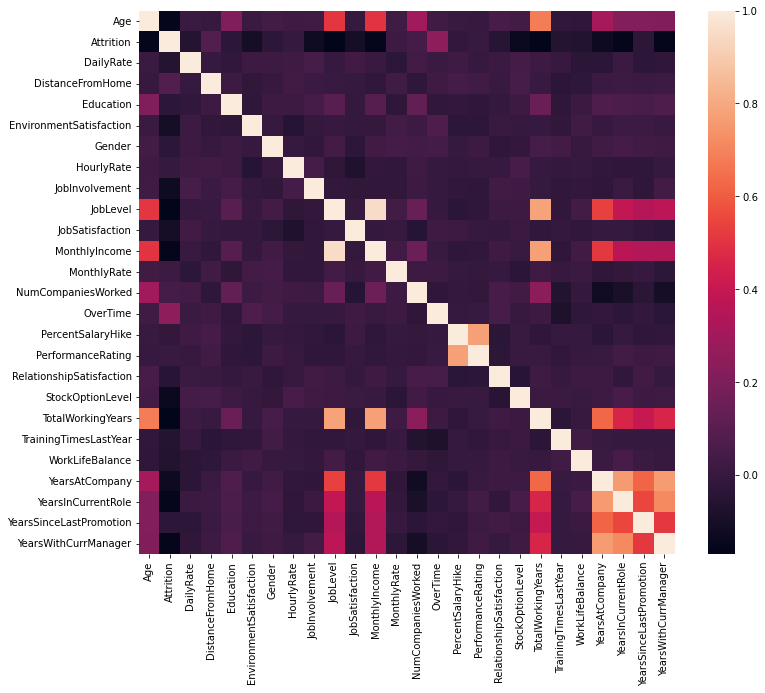

In [9]:
plt.figure(figsize=(12,10))  # Specify the width and height of the heatmap
sns.heatmap(df.corr())

For some pairplots, we'll divide the columns into three sections for better visibility

In [10]:
colno = df.shape[1]
first = df.columns[0:int(colno//3)]
second = df.columns[int(colno//3):int(2*colno//3)]
third = df.columns[int(2*colno//3):colno]

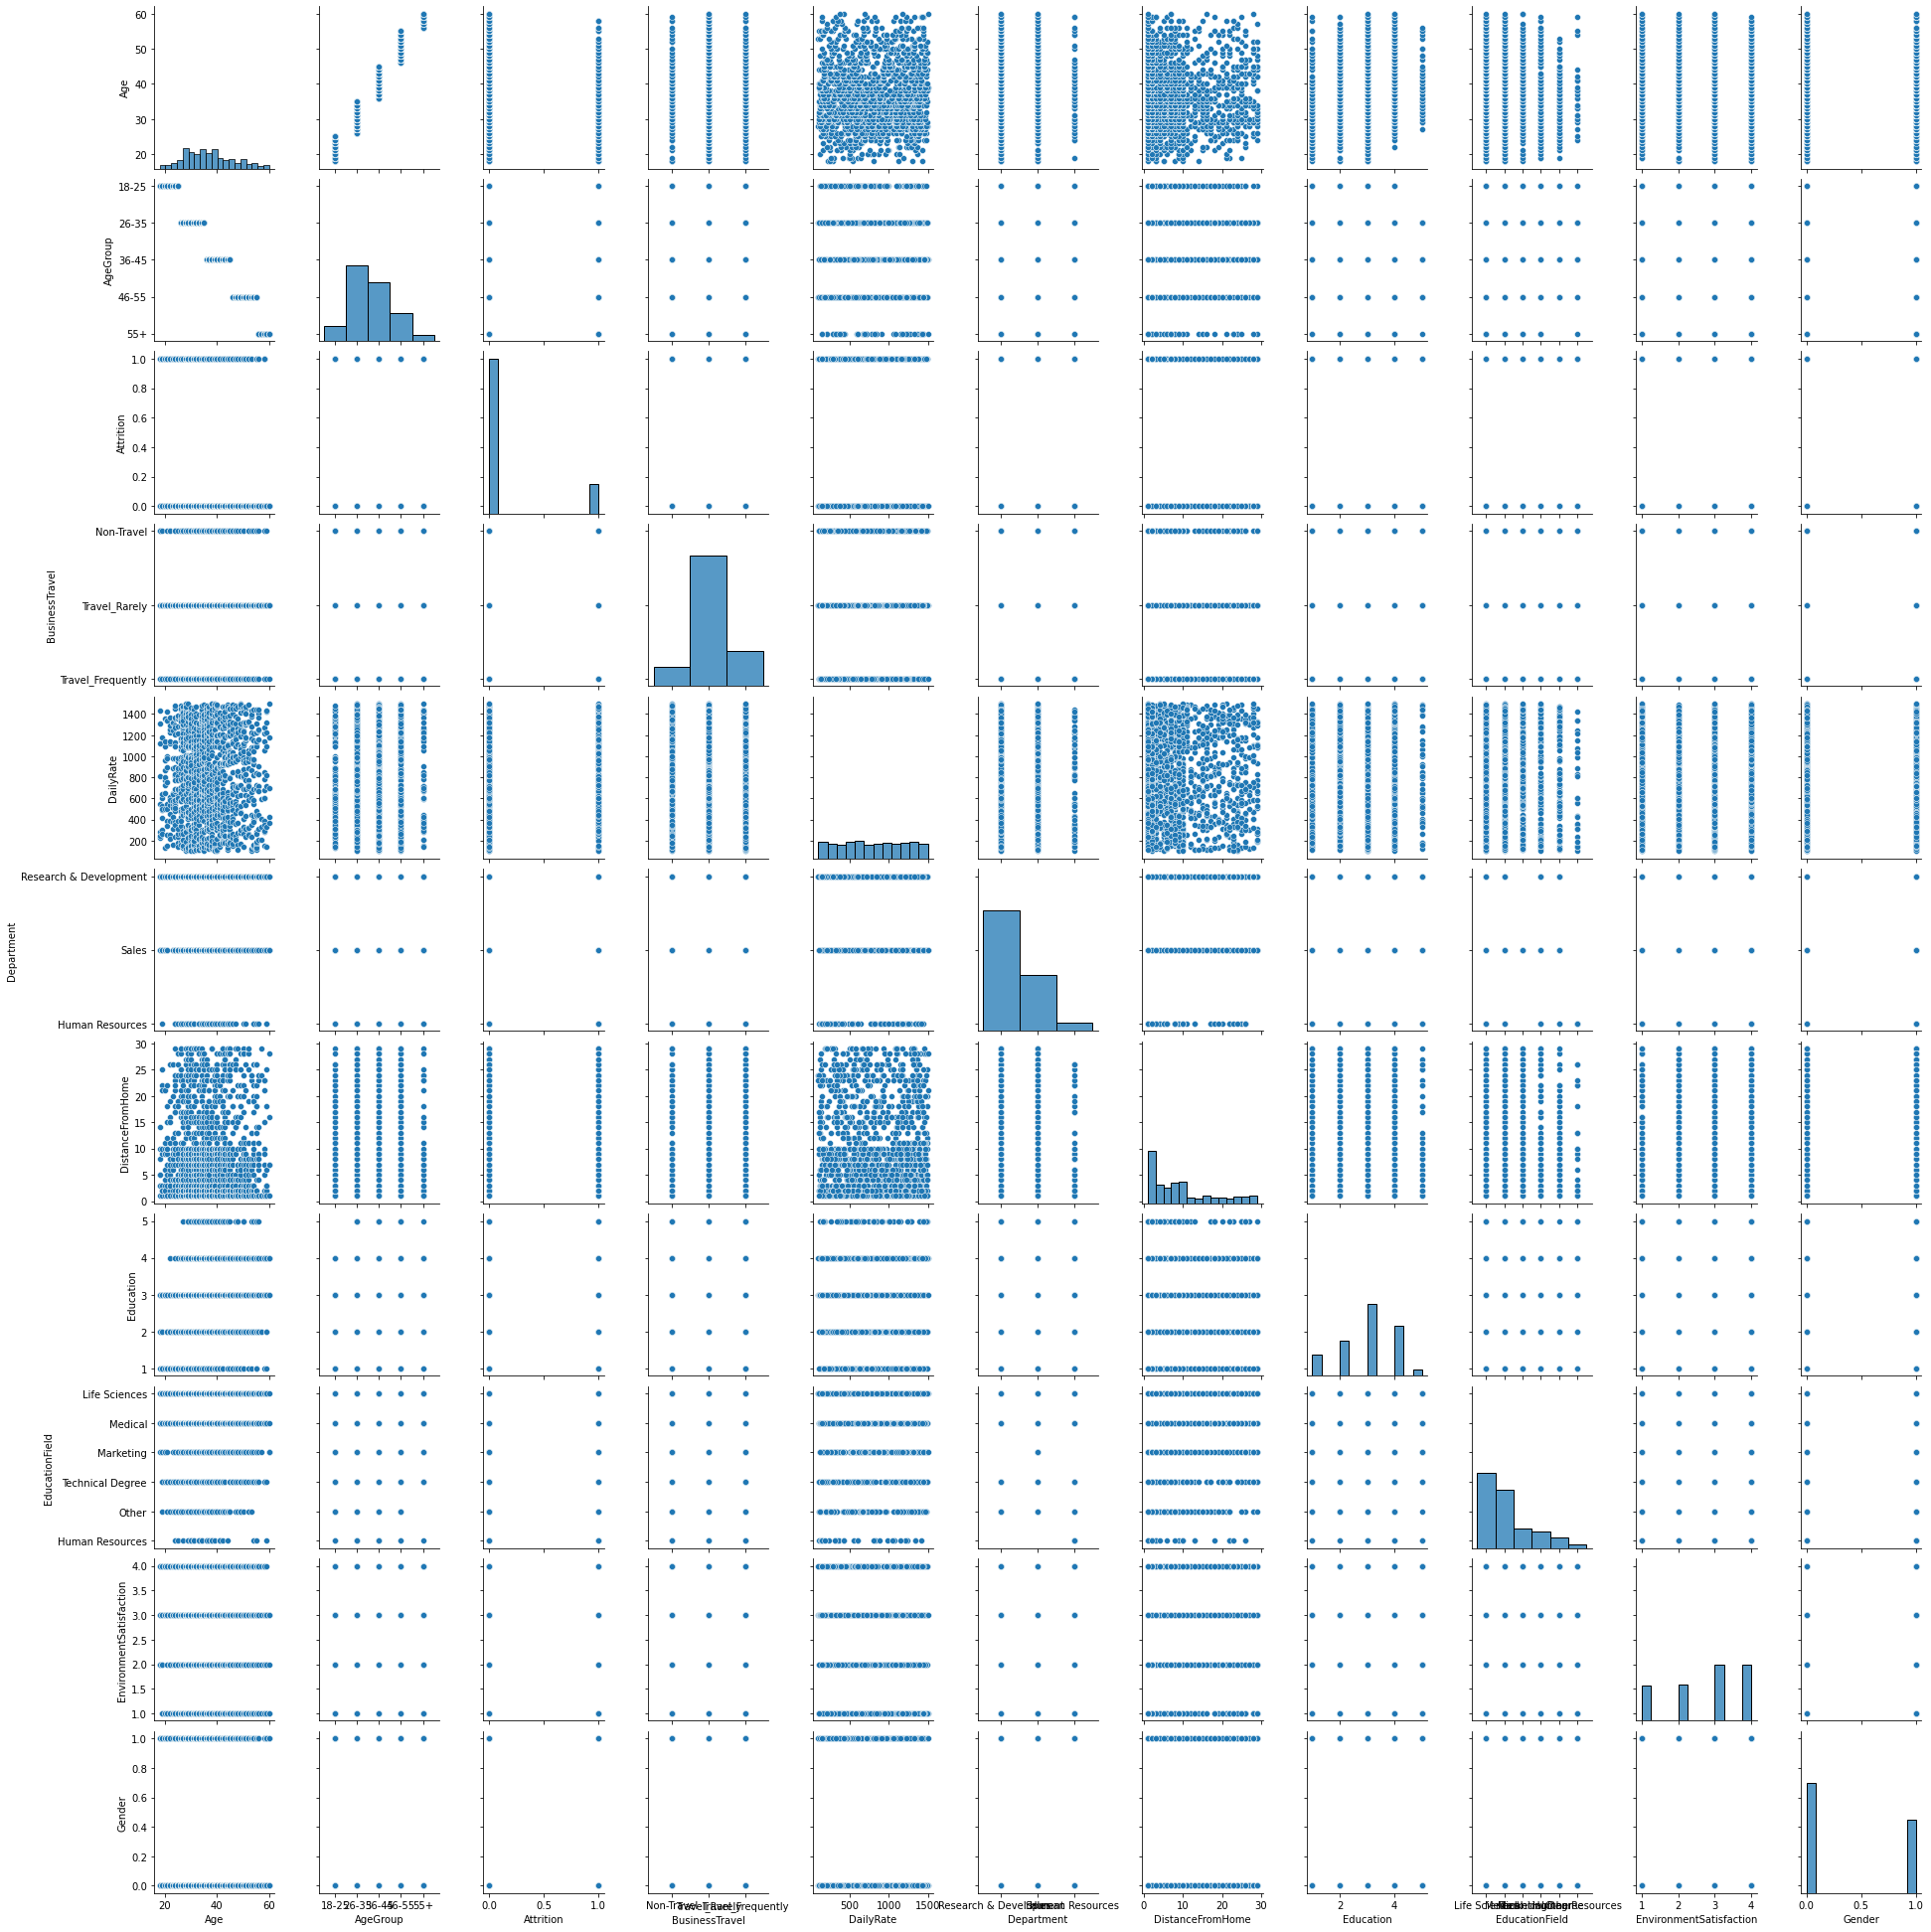

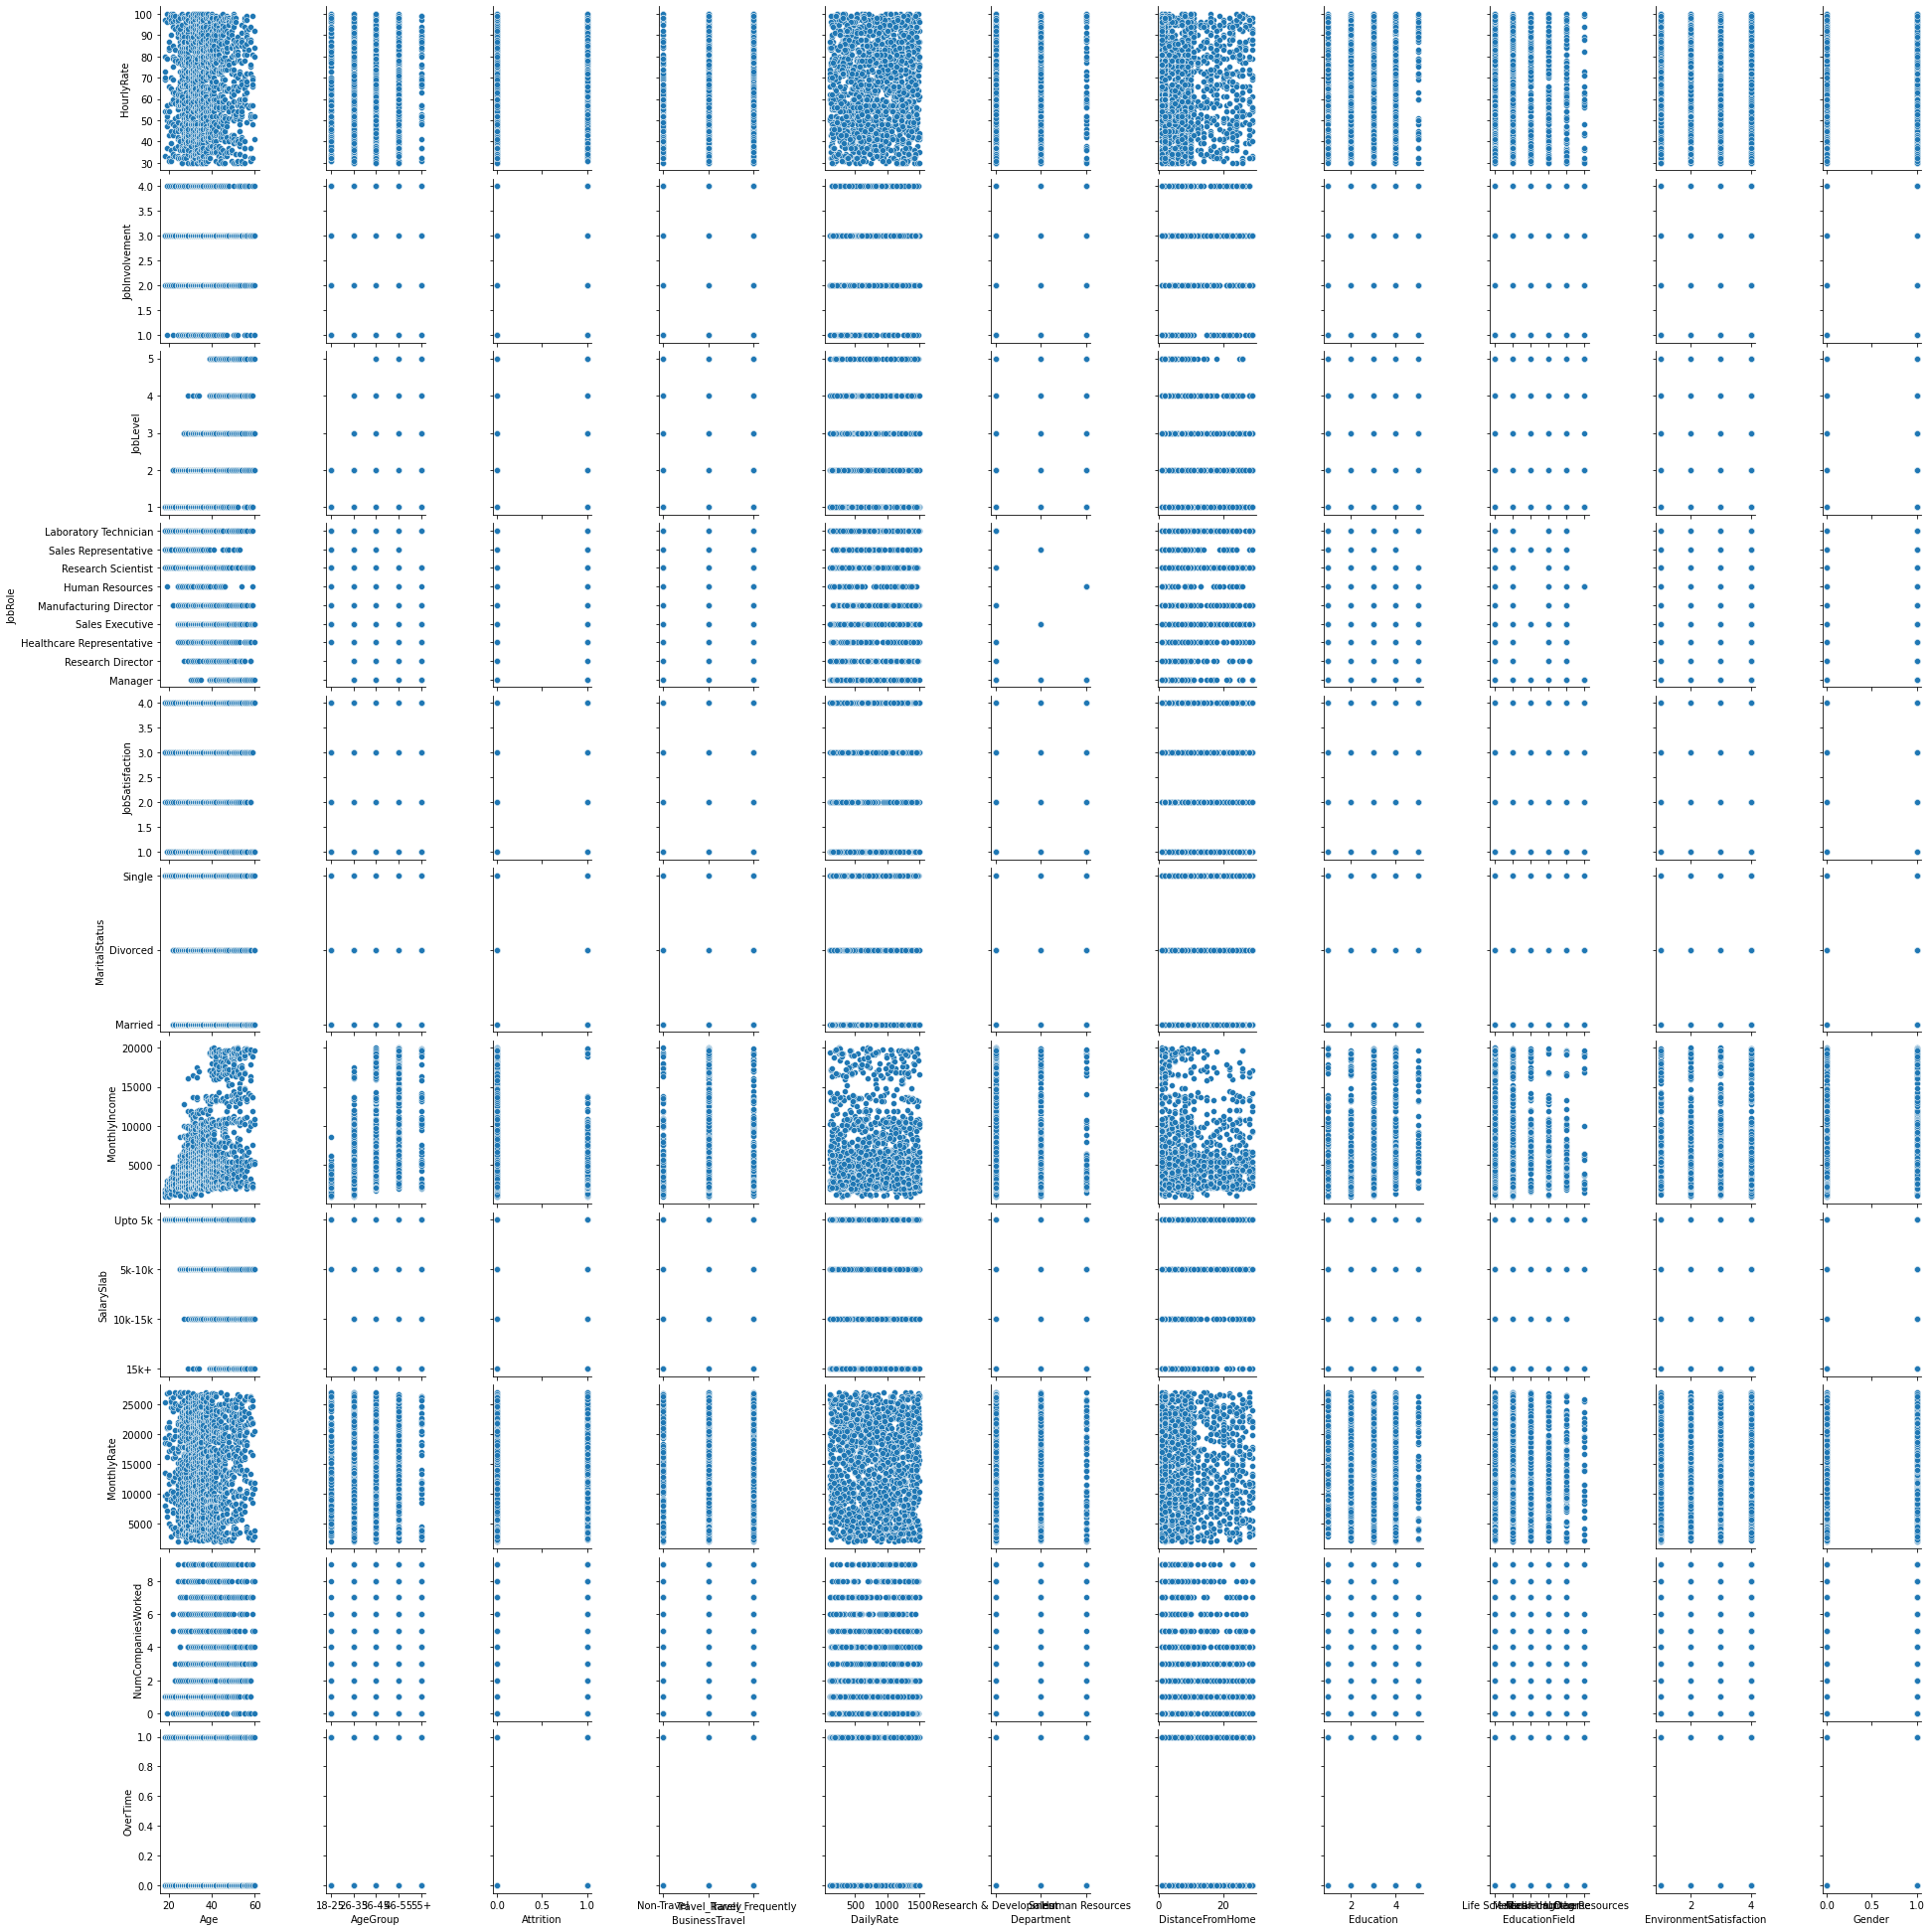

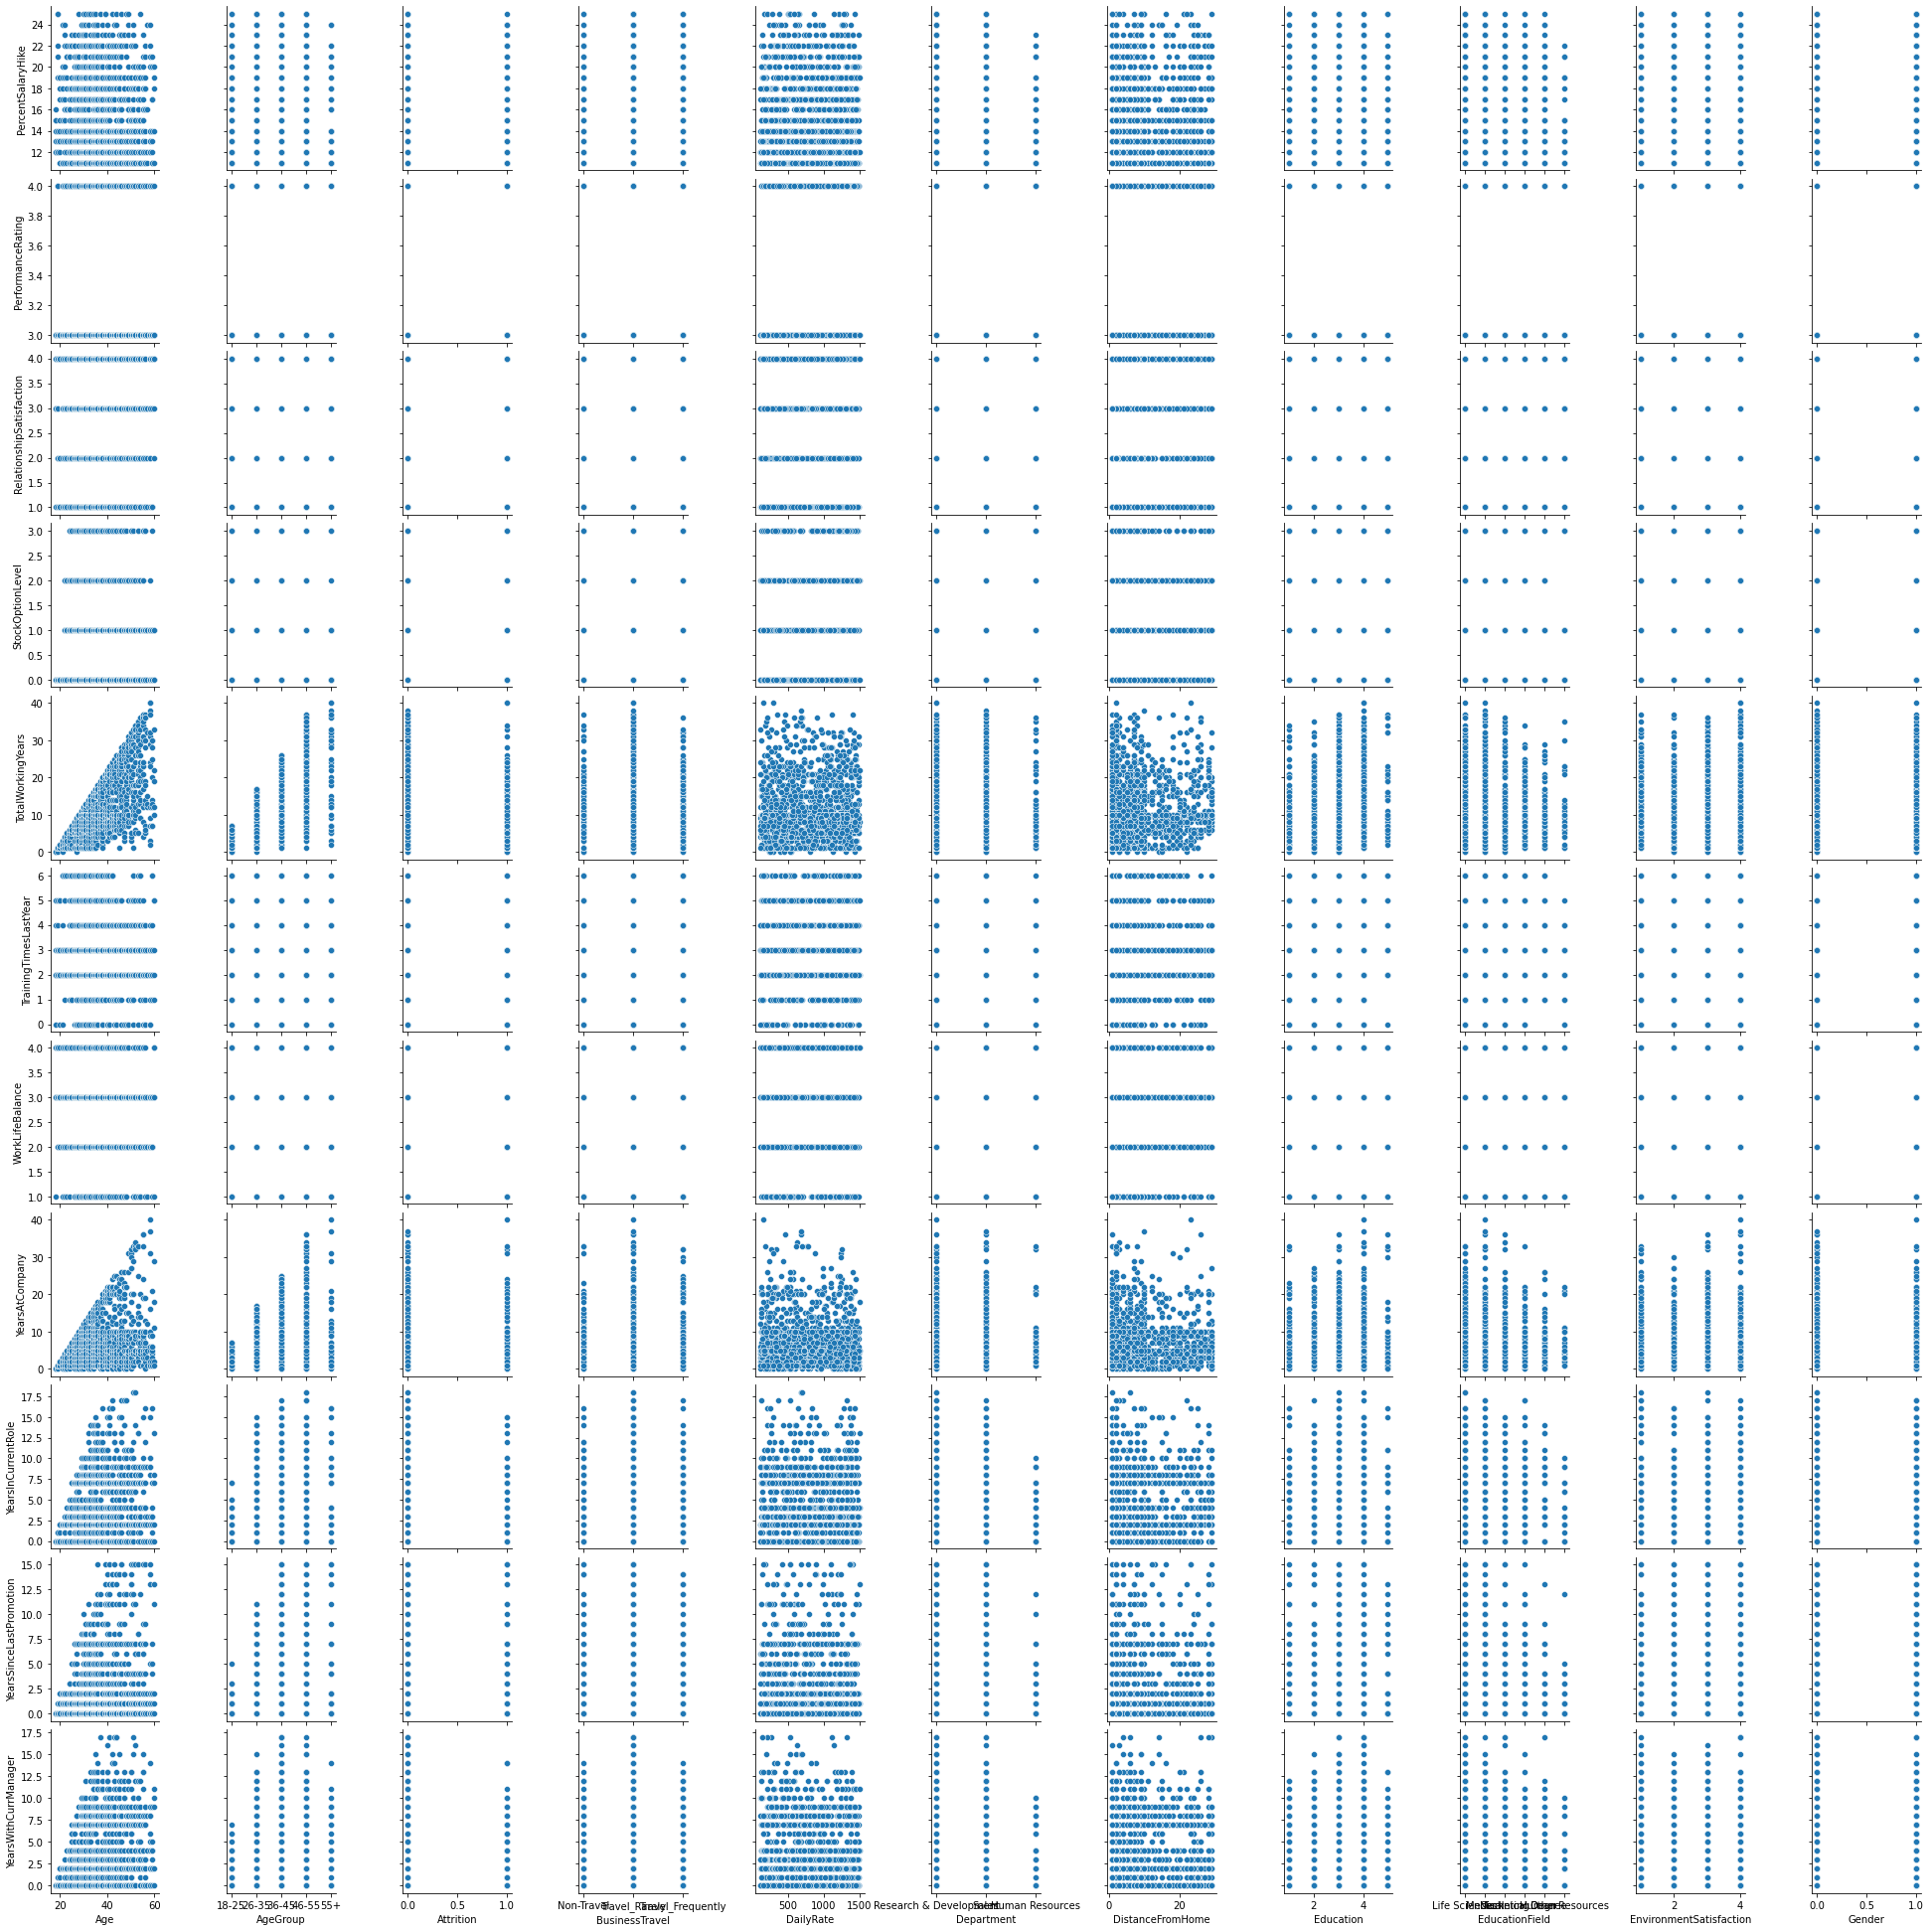

In [30]:
for section in ["first", "second", "third"]:
    sns.pairplot(data=df, x_vars=first, y_vars=eval(section))
    plt.savefig(f"Images/CR_pairp_first_{section}.png")

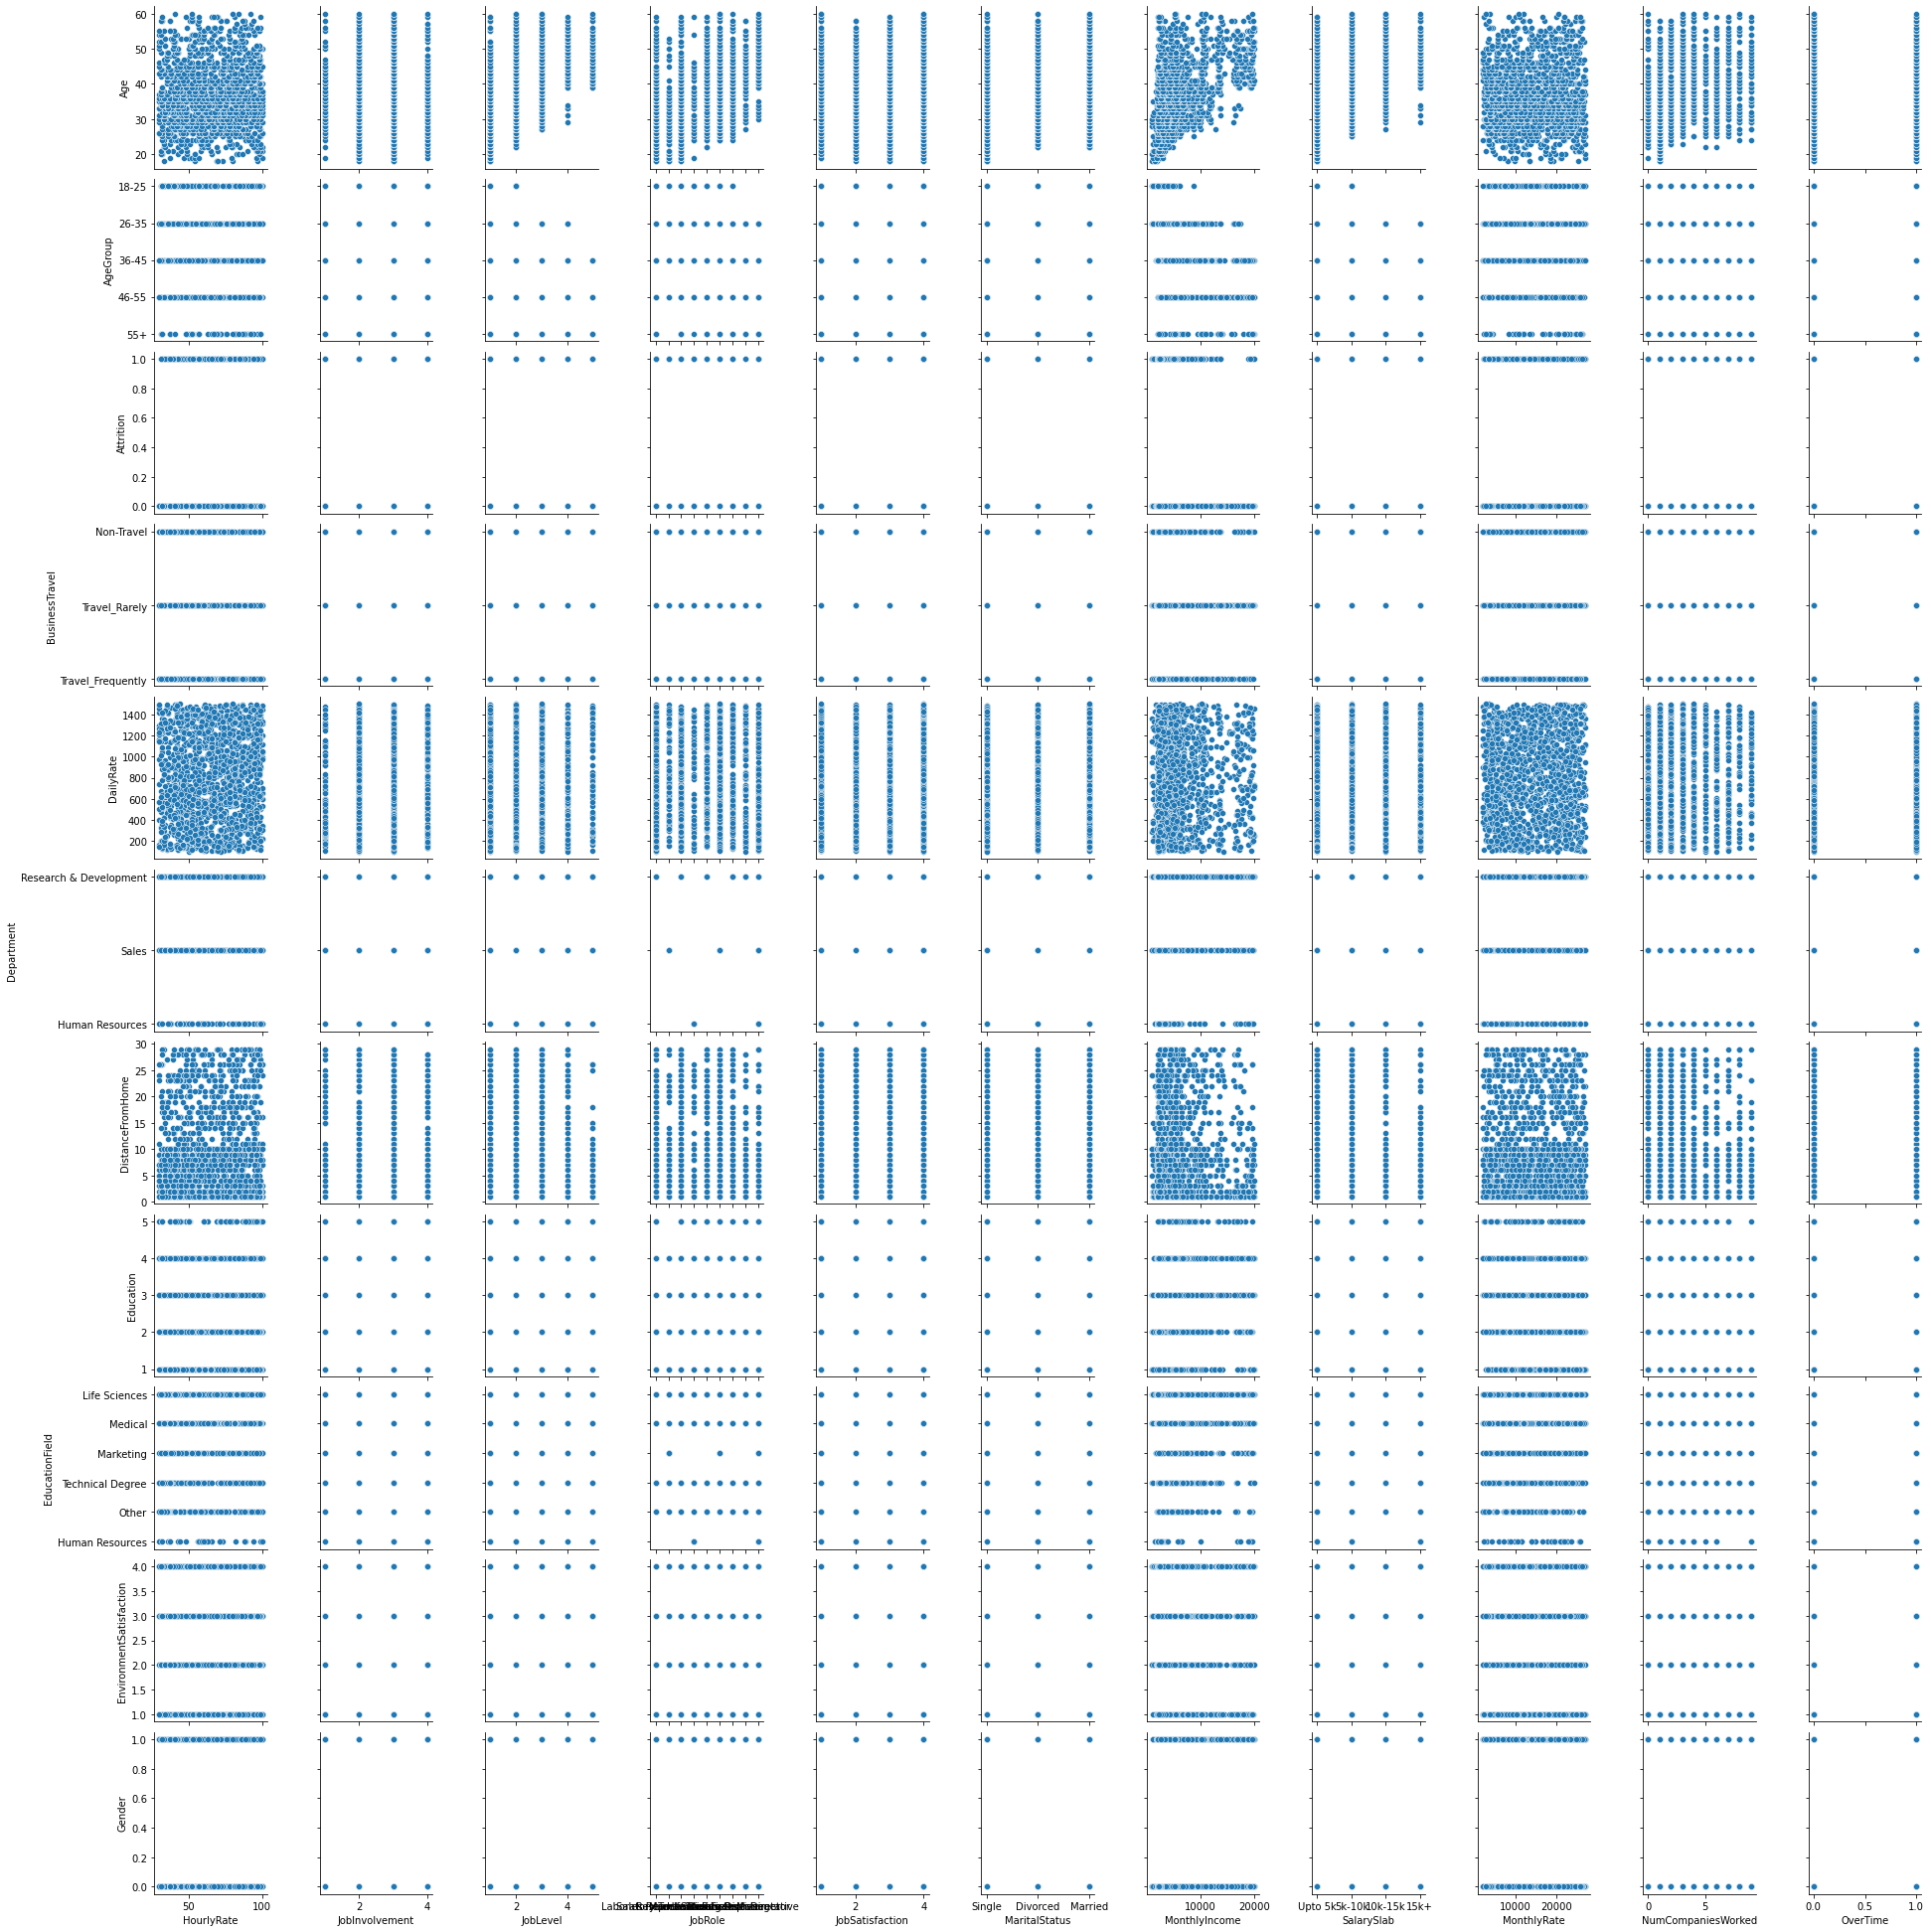

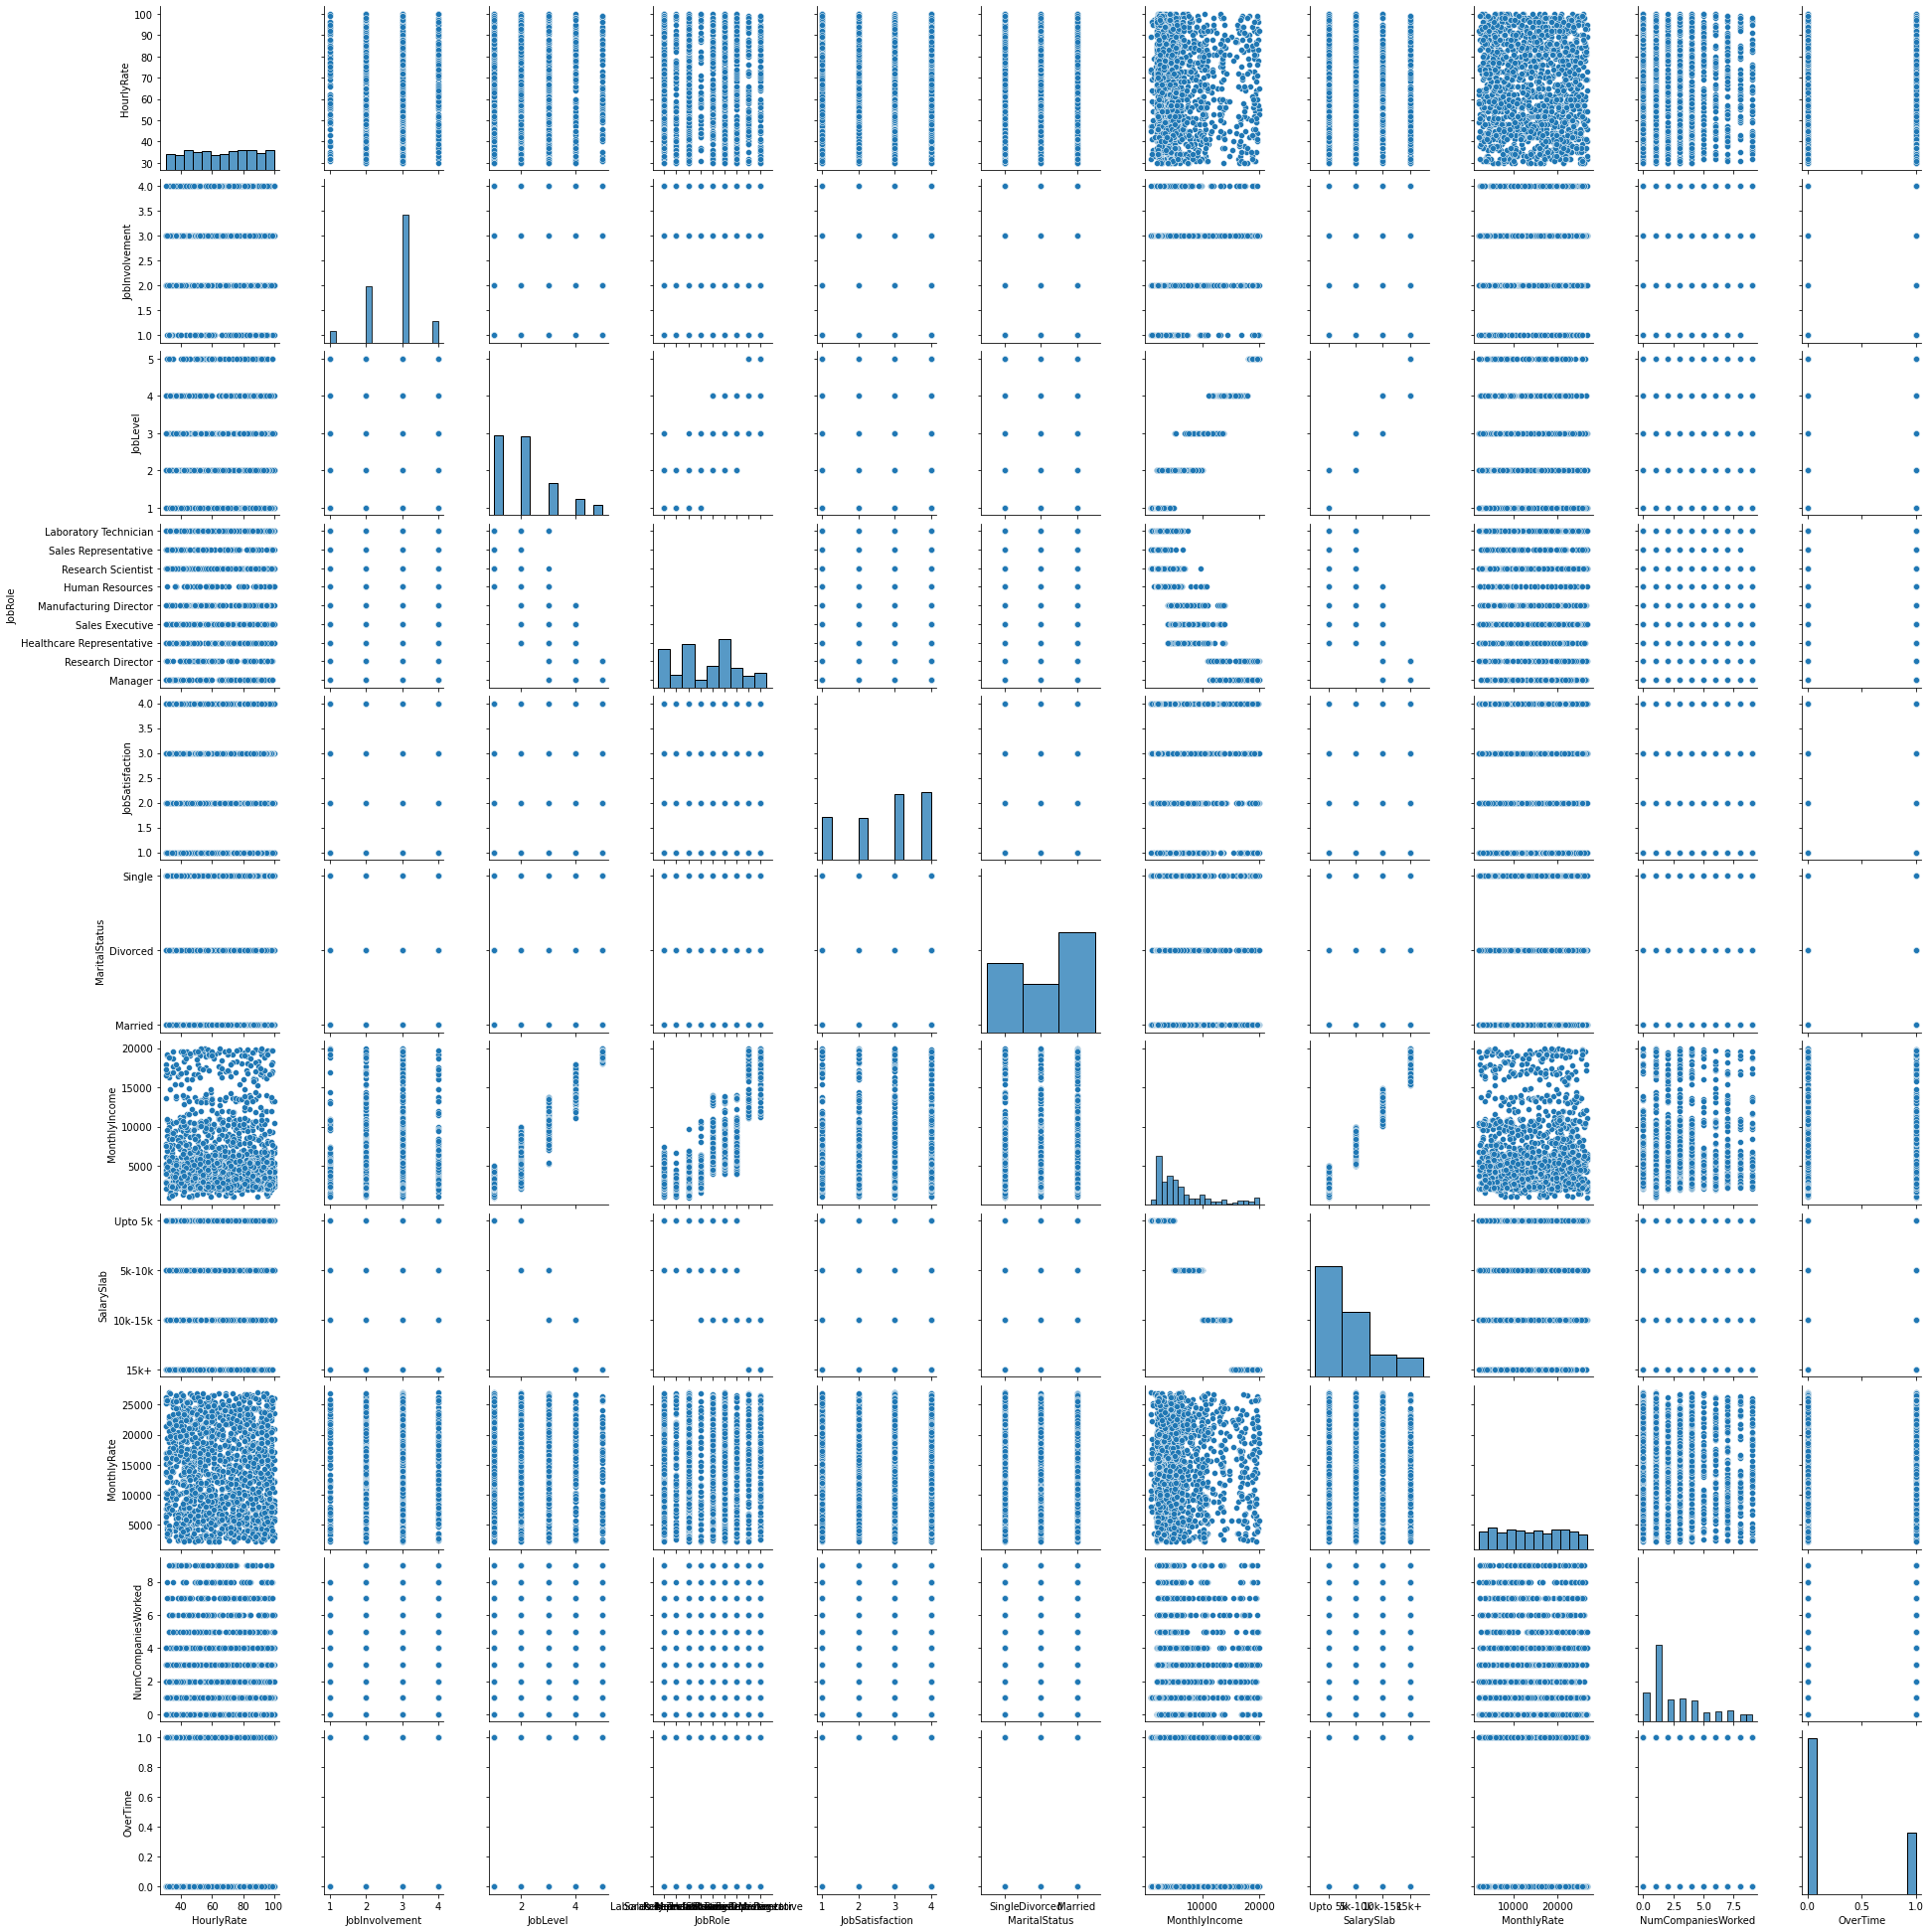

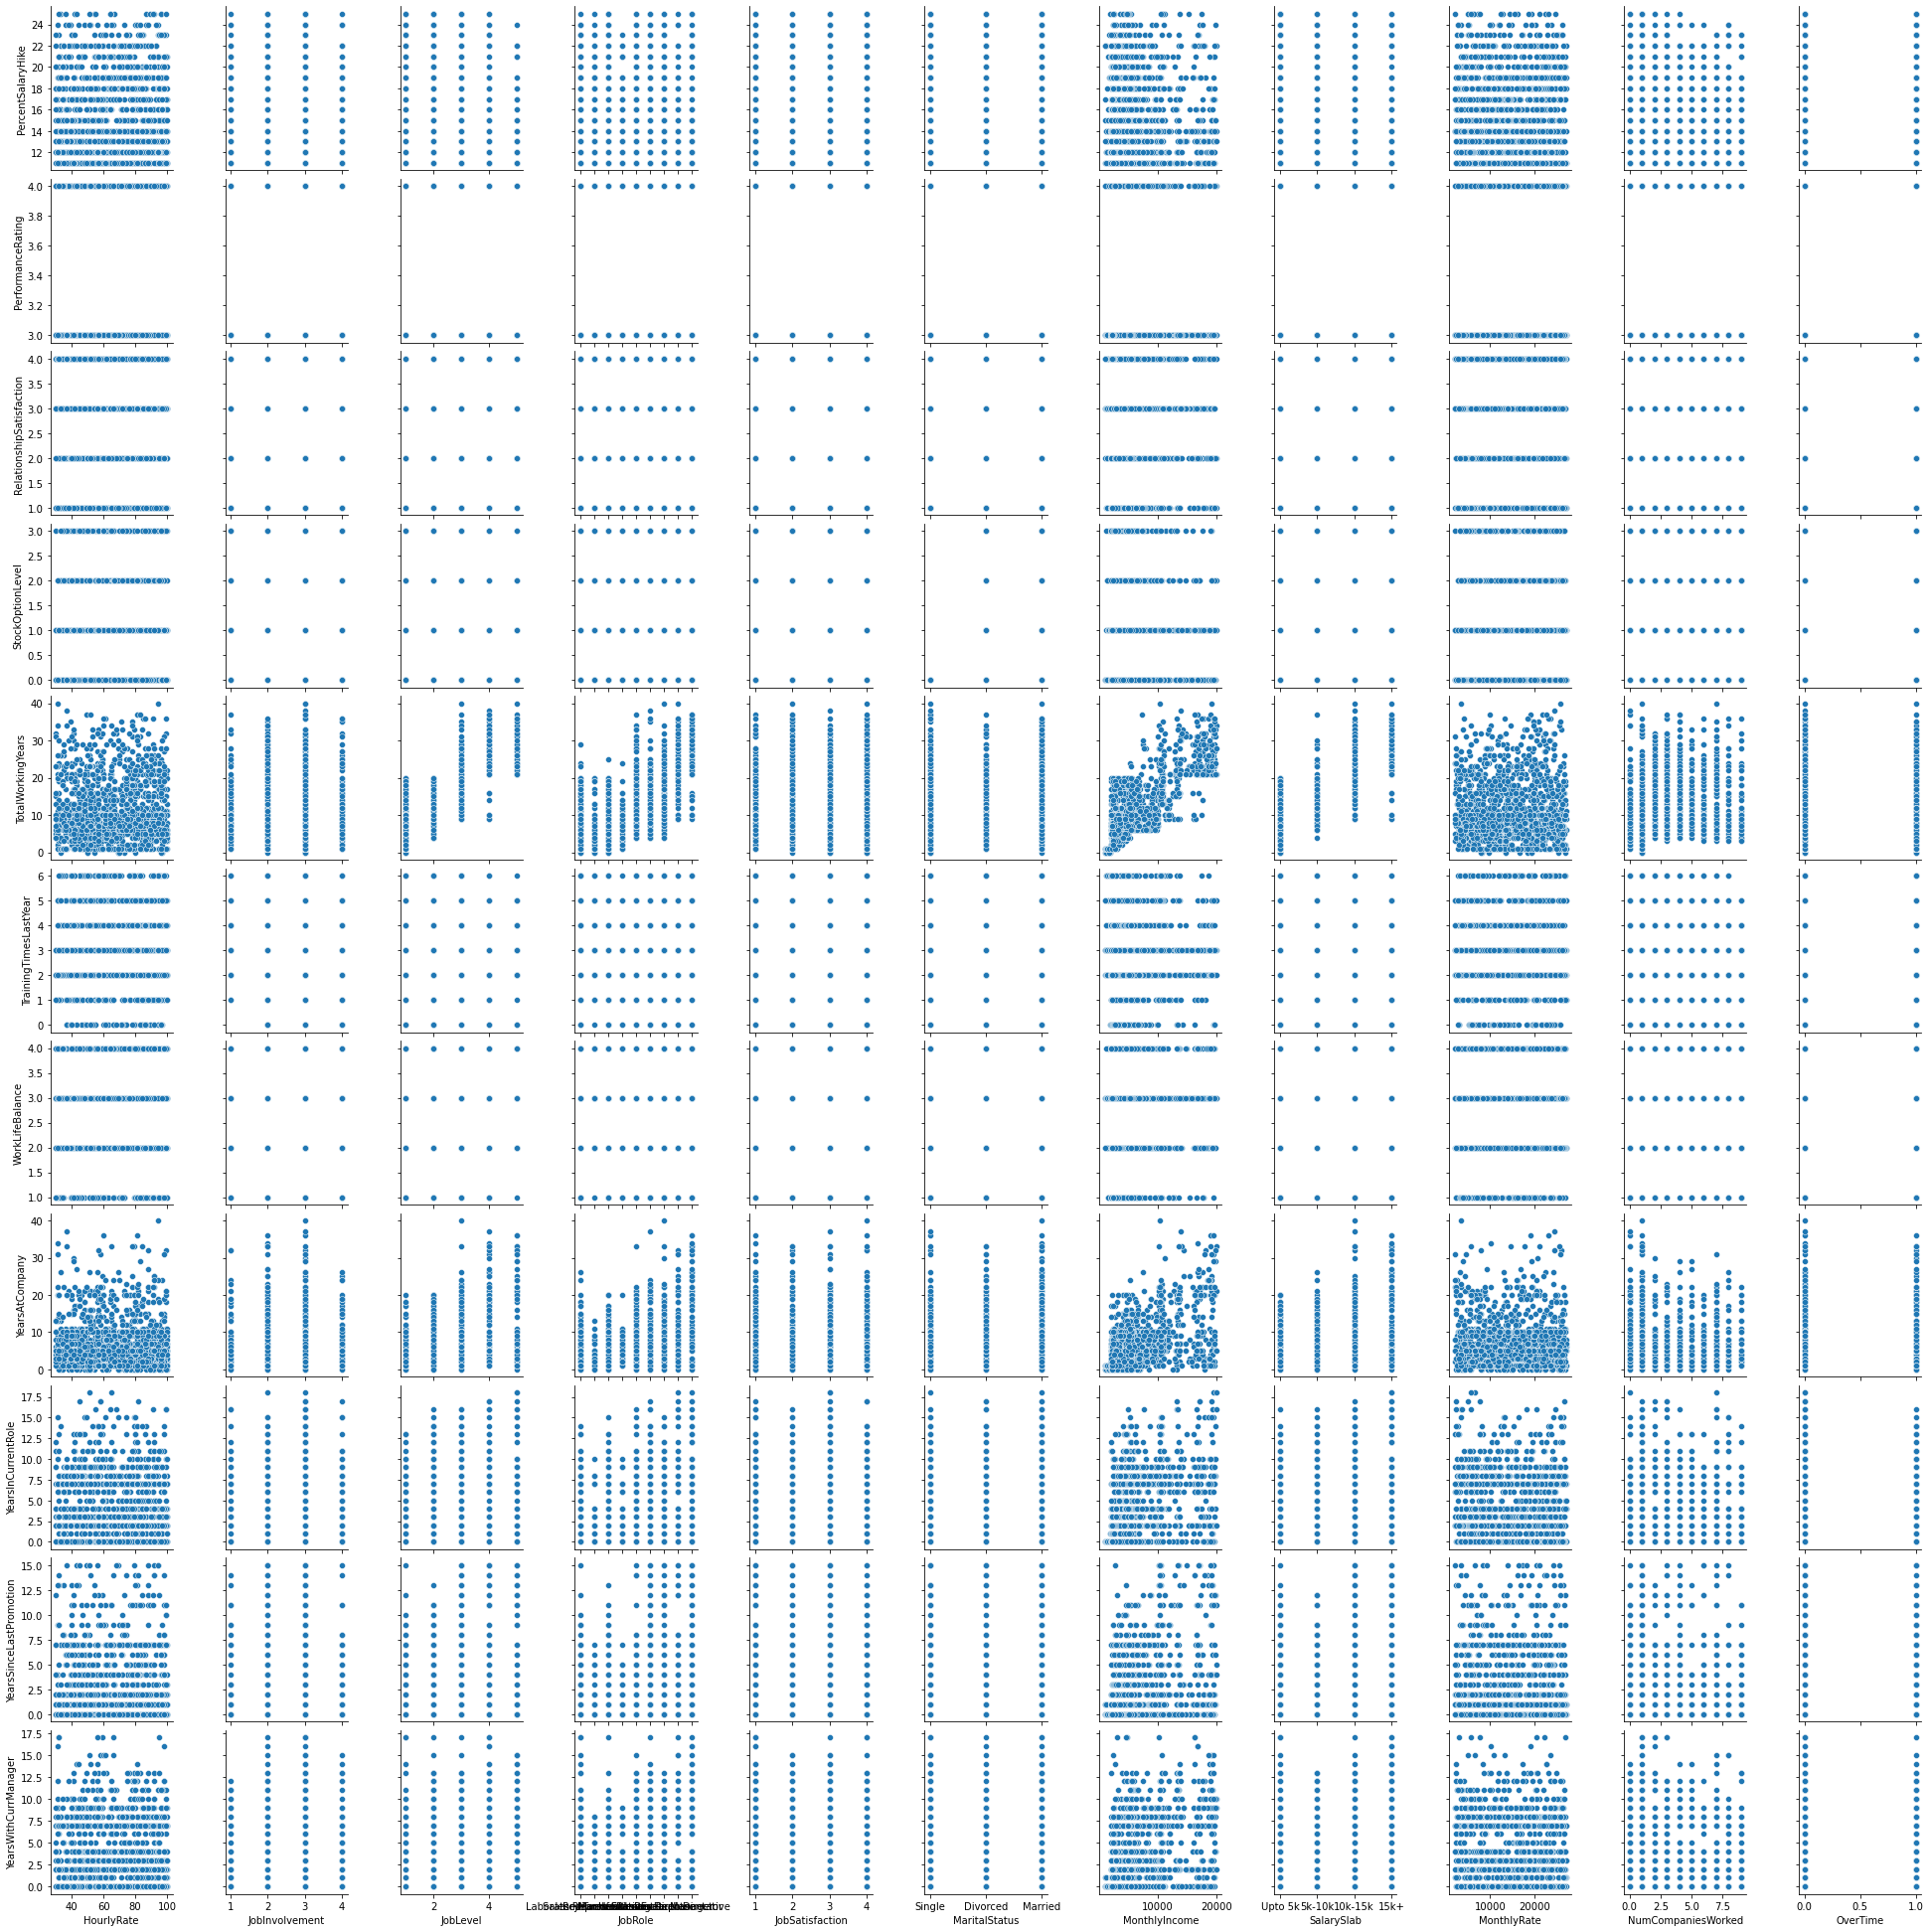

In [31]:
for section in ["first", "second", "third"]:
    sns.pairplot(data=df, x_vars=second, y_vars=eval(section))
    plt.savefig(f"Images/CR_pairp_second_{section}.png")

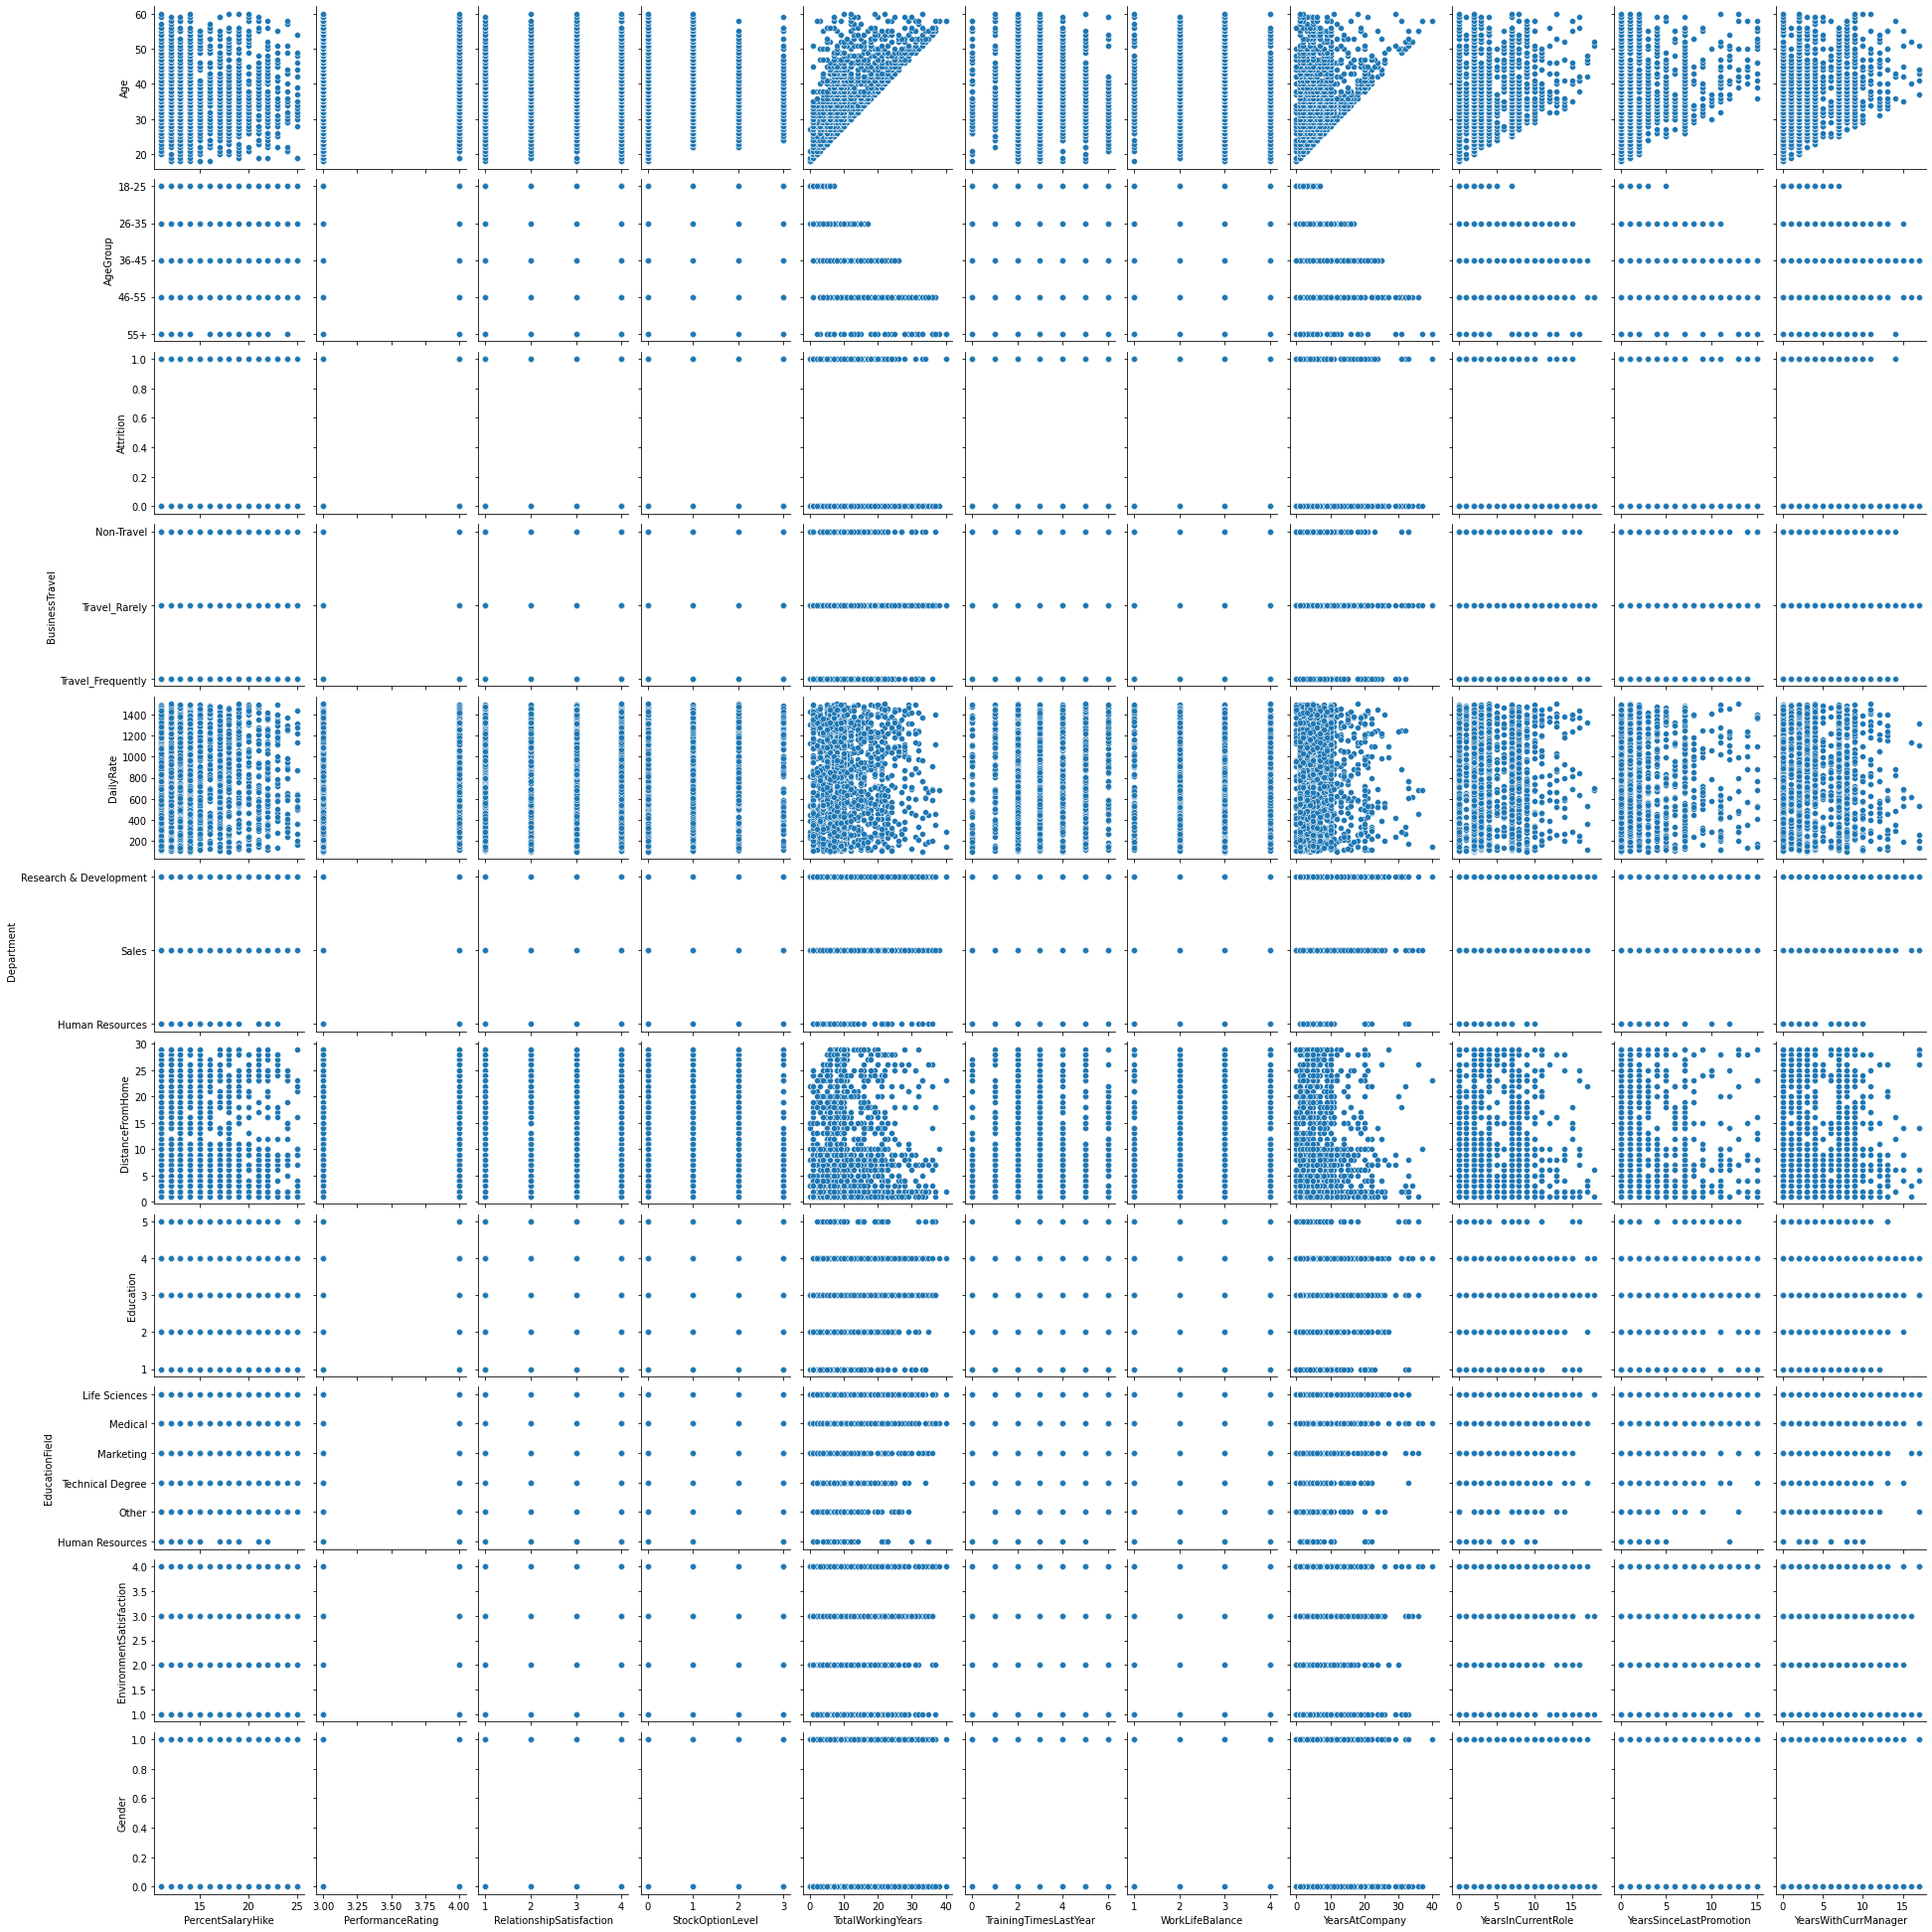

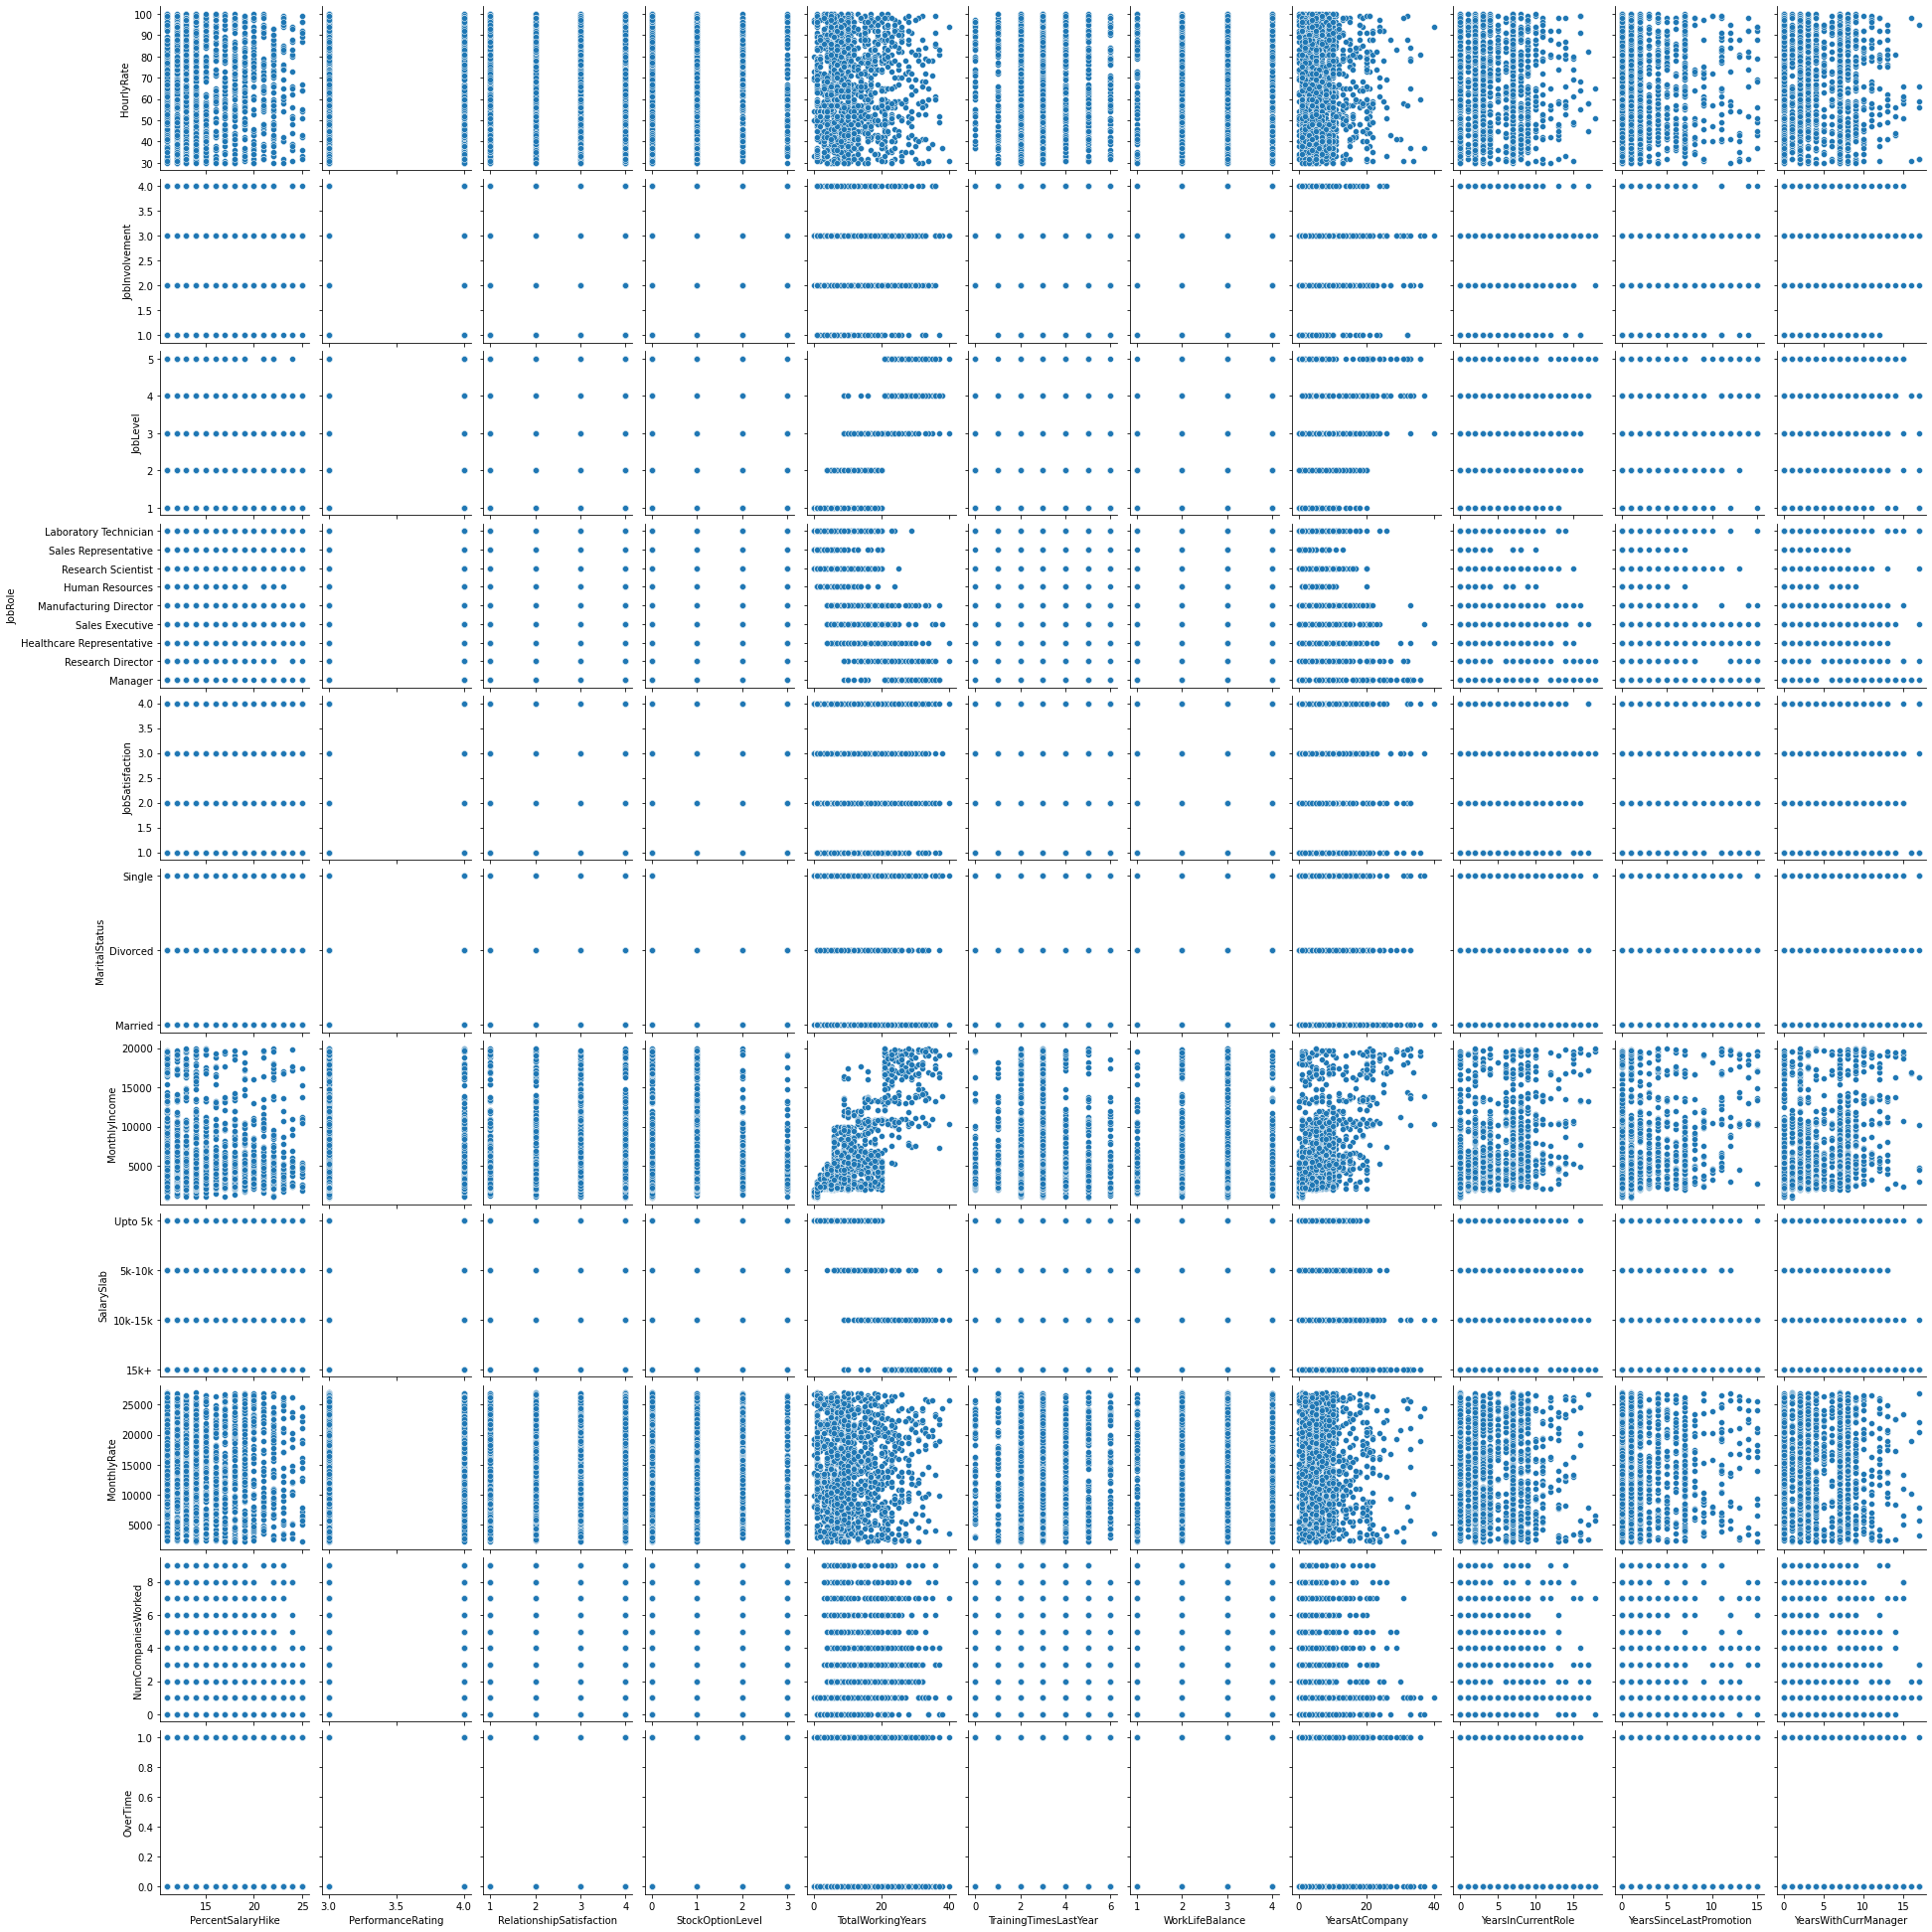

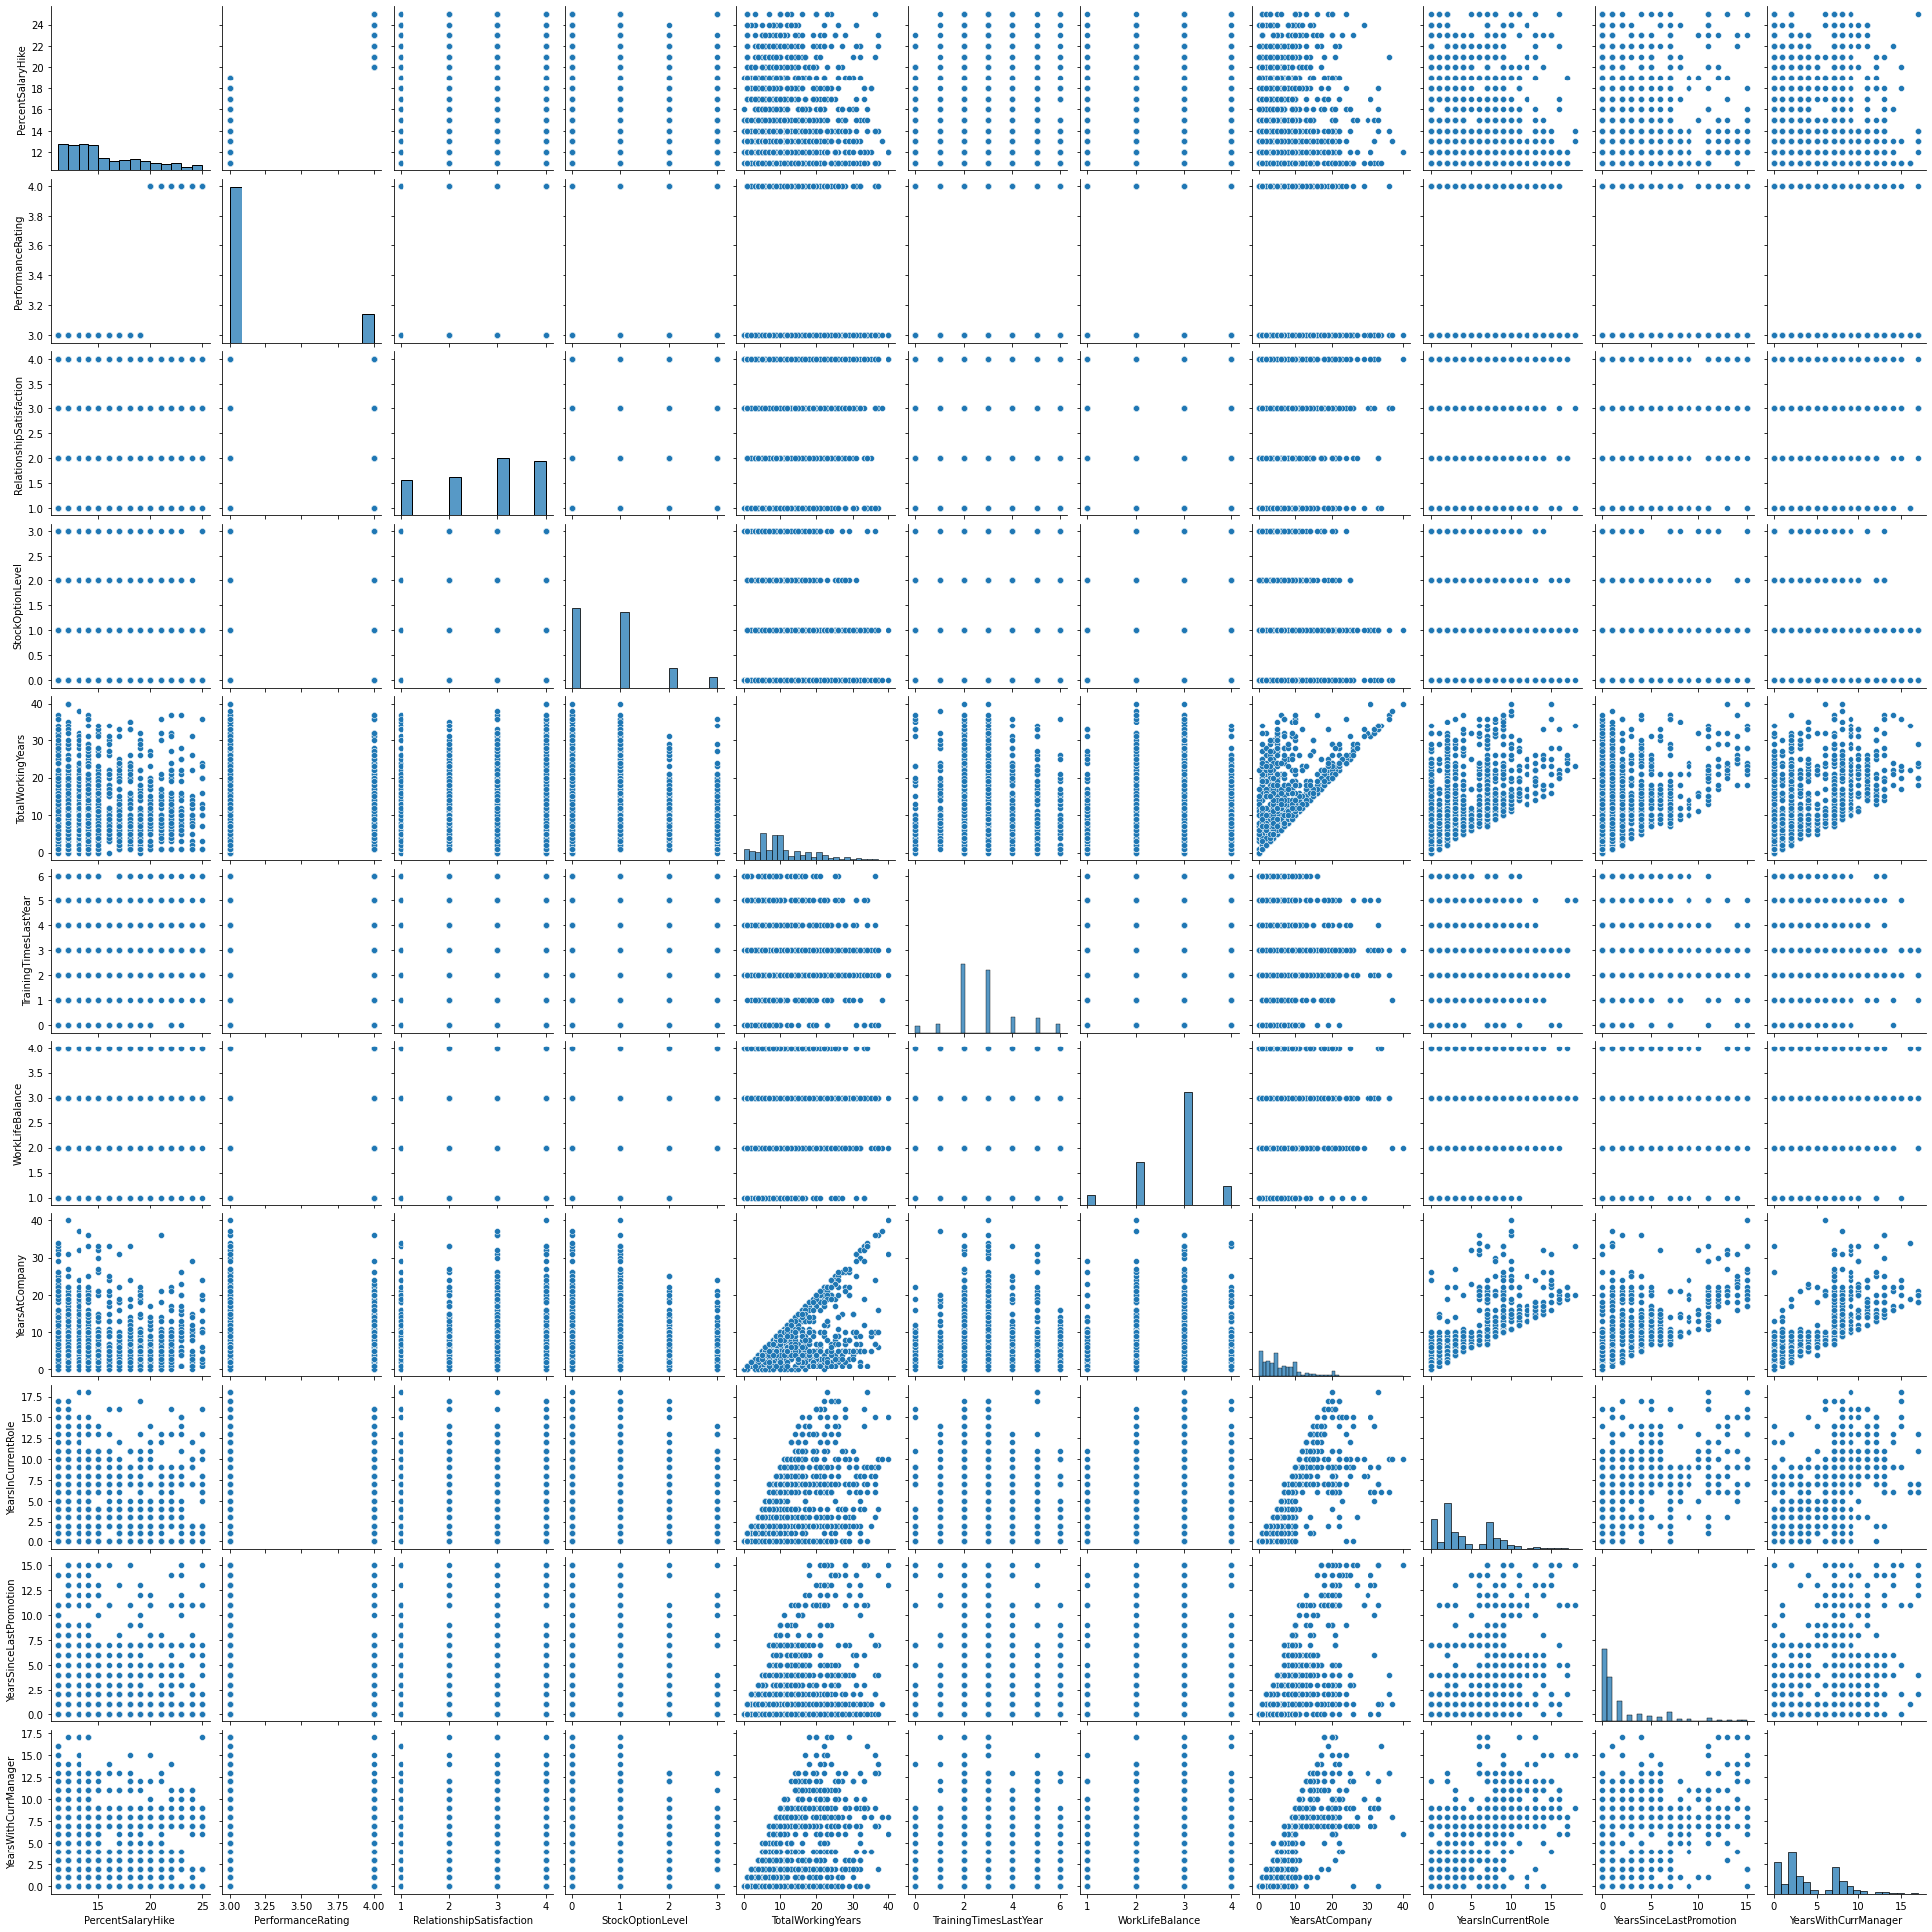

In [32]:
for section in ["first", "second", "third"]:
    sns.pairplot(data=df, x_vars=third, y_vars=eval(section))
    plt.savefig(f"Images/CR_pairp_third_{section}.png")

Take a look at numerical value distributions

In [11]:
df[first].describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1473.000000  1473.000000  1473.000000       1473.000000  1473.000000   
mean     36.917176     0.160896   802.659878          9.196877     2.911066   
std       9.130690     0.367560   403.245460          8.107754     1.024612   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction       Gender  
count              1473.000000  1473.000000  
mean                  2.723693     0.399864  
std                   1.093006     0.490037  
min                   1.000000     0.000000  
25%                   2.000000     0.000000  
50%                   3.000000     0.000000  
75%                   4.000000     1.000000  
max                   4.000000     1.000000

In [12]:
# Memorize overall attrition rate
attrition_total = df["Attrition"].mean()
print(f"The total attrition rate is {attrition_total:.2%}.")

df[second].describe()

The total attrition rate is 16.09%.


HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  \
count  1473.000000     1473.000000  1473.000000      1473.000000   
mean     65.833673        2.729803     2.063815         2.728445   
std      20.350032        0.712115     1.106429         1.103163   
min      30.000000        1.000000     1.000000         1.000000   
25%      48.000000        2.000000     1.000000         2.000000   
50%      66.000000        3.000000     2.000000         3.000000   
75%      83.000000        3.000000     3.000000         4.000000   
max     100.000000        4.000000     5.000000         4.000000   

       MonthlyIncome   MonthlyRate  NumCompaniesWorked     OverTime  
count    1473.000000   1473.000000         1473.000000  1473.000000  
mean     6500.228785  14321.376103            2.693143     0.282417  
std      4706.053923   7115.540450            2.496914     0.450328  
min      1009.000000   2094.000000            0.000000     0.000000  
25%      2911.000000   8053.000000            1.000000     0.000000  
50%      4908.000000  14242.000000            2.000000     0.000000  
75%      8380.000000  20467.000000            4.000000     1.000000  
max     19999.000000  26999.000000            9.000000     1.000000

In [13]:
df[third].describe()

PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1473.000000        1473.000000               1473.000000   
mean           15.212492           3.153428                  2.712152   
std             3.657230           0.360522                  1.081575   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1473.000000        1473.000000            1473.000000   
mean           0.793618          11.277665               2.800407   
std            0.851493           7.776228               1.289411   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1473.000000     1473.000000         1473.000000   
mean          2.761711        7.004752            4.228106   
std           0.705838        6.121004            3.621096   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1473.000000           1416.000000  
mean                  2.183978              4.117232  
std                   3.220301              3.559344  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000

Look at attrition rates per category level

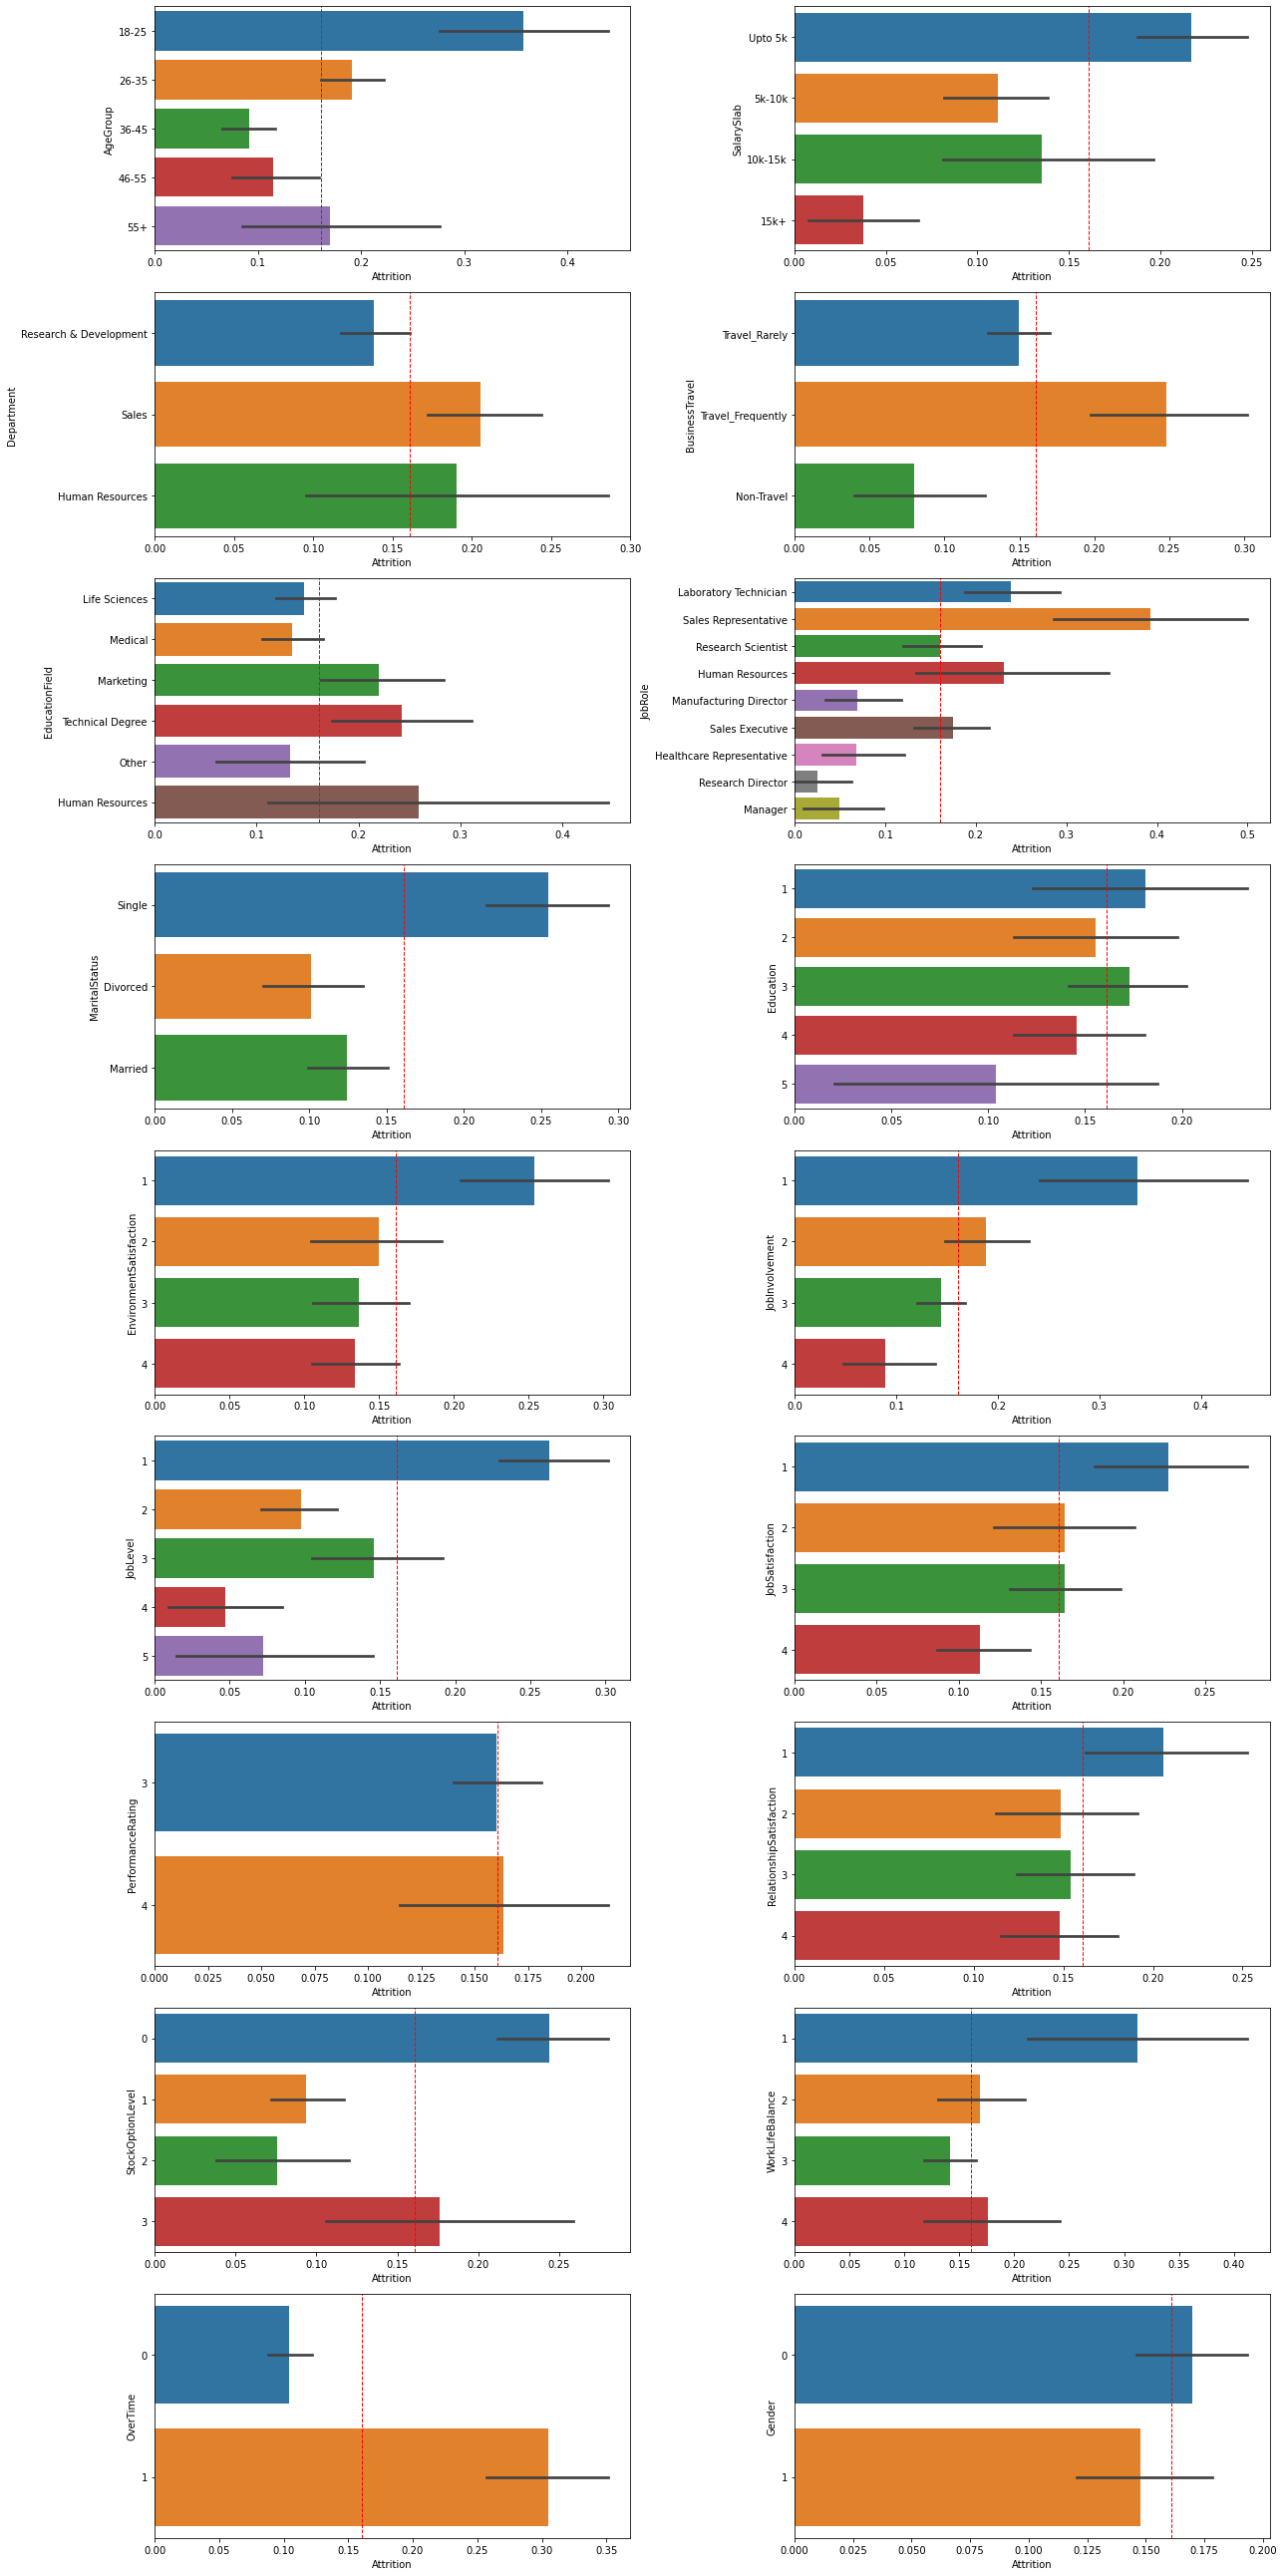

In [14]:
fig, ax = plt.subplots(nrows=len(nomcats + numcats)//2, ncols=2, figsize=(18,2*len(nomcats + numcats)))
for i, col in enumerate(nomcats + numcats):
    sns.barplot(x="Attrition", y=col, data=pd.concat([df.drop(numcats, axis=1), df[numcats].astype("category")], axis=1), ax=ax[i//2][i%2])
    ax[i//2][i%2].axvline(x=attrition_total, color='red', linestyle='--', linewidth=1)
fig.tight_layout()